# Proyecto MC:

### Enathian Ferrada
### Iñaki Bermeo
### Profesora: Alejandra Rojas
### 25/11/2025

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def generar_masas_salpeter(numero_de_estrellas):
    """
    Genera una lista de masas estelares siguiendo la IMF de Salpeter (1955)
    en el rango de 0.08 a 100 masas solares.
    
    Parámetros:
    numero_de_estrellas (int): El número de masas estelares a generar.
    
    Retorna:
    list: Una lista de masas estelares en unidades de masas solares.
    """
    
    # Rango de masas y exponente único de la IMF de Salpeter: ξ(m) ∝ m^(-2.35)
    masa_min = 0.08
    masa_max = 100.0
    alfa = 2.35

    masas_generadas = []
    # El valor máximo de la función de probabilidad ocurre en la masa más baja.
    prob_max = masa_min**(-alfa)

    print(f"Generando {numero_de_estrellas} masas estelares (Salpeter IMF). Esto puede tardar un momento...")

    while len(masas_generadas) < numero_de_estrellas:
        # Generar una masa candidata uniformemente en el rango [0.08, 100]
        masa_candidata = np.random.uniform(masa_min, masa_max)
        
        # Calcular la probabilidad de esa masa según la IMF de Salpeter
        prob_masa = masa_candidata**(-alfa)
        
        # Generar un número aleatorio para comparar
        dado_virtual = np.random.uniform(0, prob_max)
        
        # Aceptar o rechazar la masa candidata
        if dado_virtual < prob_masa:
            masas_generadas.append(masa_candidata)
            
    return np.array(masas_generadas)

Generando 1000000 masas estelares (Salpeter IMF)...

Se generaron 1000000 masas.
Masa mínima generada: 0.08 M☉
Masa máxima generada: 98.73 M☉
Masa promedio: 0.28 M☉


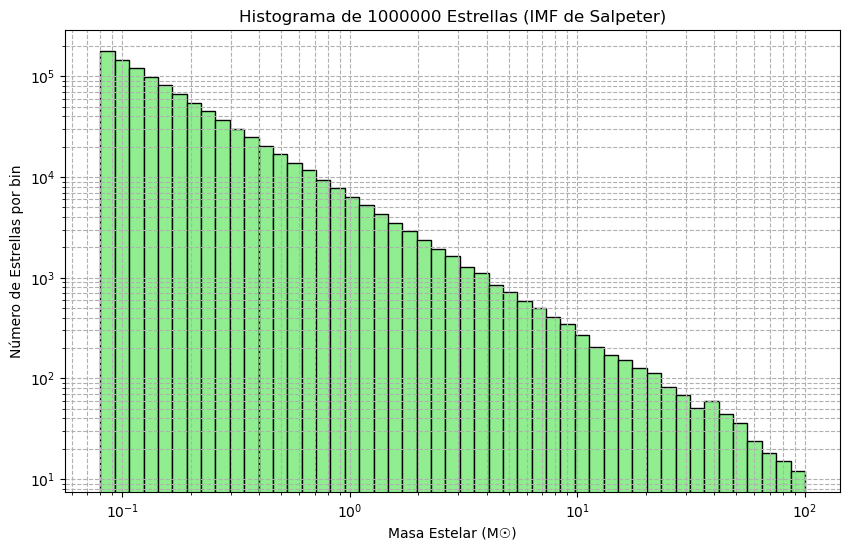

In [6]:
# Generemos una gran cantidad de estrellas para poder ver la distribución
N_ESTRELLAS = 1000000
masas_salpeter = generar_masas_salpeter(N_ESTRELLAS)

# Imprimir algunas estadísticas
print(f"\nSe generaron {len(masas_salpeter)} masas.")
print(f"Masa mínima generada: {np.min(masas_salpeter):.2f} M☉")
print(f"Masa máxima generada: {np.max(masas_salpeter):.2f} M☉")
print(f"Masa promedio: {np.mean(masas_salpeter):.2f} M☉")

# Visualización: En escala log-log, esto debería verse como una única línea recta
plt.figure(figsize=(10, 6))
bins = np.logspace(np.log10(0.08), np.log10(100), 50)
plt.hist(masas_salpeter, bins=bins, color='lightgreen', edgecolor='black')

plt.xscale('log')
plt.yscale('log')
plt.title(f'Histograma de {N_ESTRELLAS} Estrellas (IMF de Salpeter)')
plt.xlabel('Masa Estelar (M☉)')
plt.ylabel('Número de Estrellas por bin')
plt.grid(True, which="both", ls="--")
plt.show()

Generando 1000000 masas estelares (Salpeter IMF)...
¡Generación de masas completada!

--- Simulación Preliminar Completada ---
Total de estrellas simuladas: 1000000
Masa promedio: 0.28 M☉
Tiempo de nacimiento promedio: 5.00 Gyr


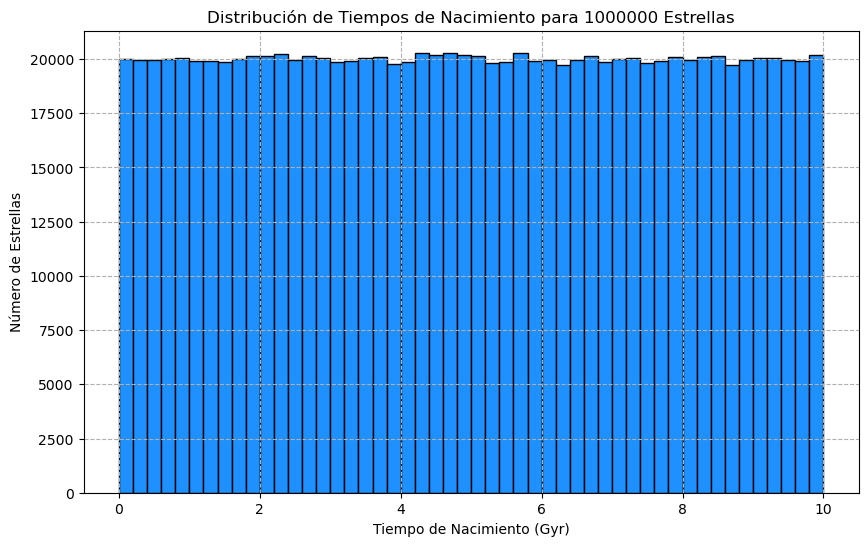

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# --- PASO 1: FUNCIÓN PARA GENERAR MASAS (LA MANTENEMOS IGUAL) ---

def generar_masas_salpeter(numero_de_estrellas):
    """Genera masas estelares siguiendo la IMF de Salpeter."""
    masa_min = 0.08
    masa_max = 100.0
    alfa = 2.35
    masas_generadas = []
    prob_max = masa_min**(-alfa)

    print(f"Generando {numero_de_estrellas} masas estelares (Salpeter IMF)...")

    while len(masas_generadas) < numero_de_estrellas:
        n_necesarias = numero_de_estrellas - len(masas_generadas)
  
        n_candidatas = int(n_necesarias * 1.5)
        
        masas_candidatas = np.random.uniform(masa_min, masa_max, n_candidatas)
        prob_masas = masas_candidatas**(-alfa)
        dados_virtuales = np.random.uniform(0, prob_max, n_candidatas)
        
        masas_aceptadas = masas_candidatas[dados_virtuales < prob_masas]
        masas_generadas.extend(masas_aceptadas)

    print("¡Generación de masas completada!")
    # Devolvemos exactamente el número de estrellas pedido
    return np.array(masas_generadas[:numero_de_estrellas])



N_ESTRELLAS = 1000000

# === PASO 1: GENERAR TODAS LAS MASAS INICIALES ===
masas_iniciales = generar_masas_salpeter(N_ESTRELLAS)

# === PASO 2: ASIGNAR TIEMPOS DE NACIMIENTO ===
# La edad de la Vía Láctea es 10 Gyr.
edad_galaxia = 10.0  # en Gyr

# Generamos un tiempo de nacimiento para cada estrella de una distribución uniforme
tiempos_de_nacimiento = np.random.uniform(0.0, edad_galaxia, N_ESTRELLAS)

print("\n--- Simulación Preliminar Completada ---")
print(f"Total de estrellas simuladas: {len(masas_iniciales)}")
print(f"Masa promedio: {np.mean(masas_iniciales):.2f} M☉")
print(f"Tiempo de nacimiento promedio: {np.mean(tiempos_de_nacimiento):.2f} Gyr")

# Visualización del Tiempo de Nacimiento (para comprobar) 
plt.figure(figsize=(10, 6))
plt.hist(tiempos_de_nacimiento, bins=50, color='dodgerblue', edgecolor='black')
plt.title(f'Distribución de Tiempos de Nacimiento para {N_ESTRELLAS} Estrellas')
plt.xlabel('Tiempo de Nacimiento (Gyr)')
plt.ylabel('Número de Estrellas')
plt.grid(True, ls="--")
plt.show()

## HISTOGRAMAS DE MASAS y EDADES

### Para 1.000.000 Estrellas:

Generando 1000000 masas estelares (Salpeter IMF)...
¡Generación de masas completada!

Iniciando Paso 4: Clasificación de remanentes...
Clasificación completada.

--- Composición de la Galaxia Simulada ---
Estrellas de Secuencia Principal: 978321 (97.83%)
Enanas Blancas: 19665 (1.97%)
Estrellas de Neutrones: 1471 (0.15%)
Agujeros Negros: 543 (0.05%)

Generando el histograma de distribución de masas finales...


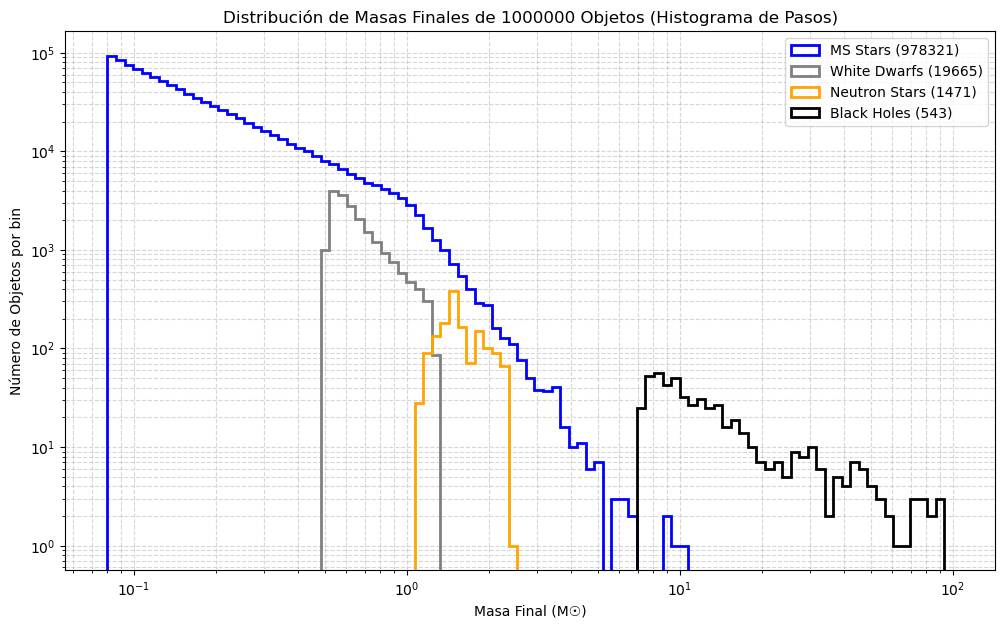

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


def generar_masas_salpeter(numero_de_estrellas):
    """Genera masas estelares siguiendo la IMF de Salpeter."""
    masa_min = 0.08
    masa_max = 100.0
    alfa = 2.35
    masas_generadas = []
    prob_max = masa_min**(-alfa)

    print(f"Generando {numero_de_estrellas} masas estelares (Salpeter IMF)...")
    
    while len(masas_generadas) < numero_de_estrellas:
        n_necesarias = numero_de_estrellas - len(masas_generadas)
        n_candidatas = int(n_necesarias * 1.5)
        
        masas_candidatas = np.random.uniform(masa_min, masa_max, n_candidatas)
        prob_masas = masas_candidatas**(-alfa)
        dados_virtuales = np.random.uniform(0, prob_max, n_candidatas)
        
        masas_aceptadas = masas_candidatas[dados_virtuales < prob_masas]
        masas_generadas.extend(masas_aceptadas)

    print("¡Generación de masas completada!")
    return np.array(masas_generadas[:numero_de_estrellas])



N_ESTRELLAS = 1000000 
edad_galaxia = 10.0 

masas_iniciales = generar_masas_salpeter(N_ESTRELLAS)
tiempos_de_nacimiento = np.random.uniform(0.0, edad_galaxia, N_ESTRELLAS)
edades_actuales = edad_galaxia - tiempos_de_nacimiento
tiempos_de_vida_ms = 10.0 / (masas_iniciales**2.5)
es_ms = edades_actuales <= tiempos_de_vida_ms
es_remanente = ~es_ms # El símbolo ~ significa "not", es la negación de es_ms

# === PASO 4: DETERMINAR EL TIPO Y MASA DEL REMANENTE ===
print("\nIniciando Paso 4: Clasificación de remanentes...")

# Inicializamos los arrays de resultados
masas_finales = np.zeros(N_ESTRELLAS)
tipos_de_objetos = np.full(N_ESTRELLAS, "", dtype='<U12') # U12 es un string de hasta 12 caracteres

masas_finales[es_ms] = masas_iniciales[es_ms]
tipos_de_objetos[es_ms] = 'MS Star'


mascara_wd = es_remanente & (masas_iniciales < 8)
mascara_ns = es_remanente & (masas_iniciales >= 8) & (masas_iniciales < 20)
mascara_bh = es_remanente & (masas_iniciales >= 20)

# >> Para ENANAS BLANCAS (WD) - Fórmula de Kalirai et al. (2008)
# M_final = 0.109 * M_inicial + 0.394
masas_finales[mascara_wd] = 0.109 * masas_iniciales[mascara_wd] + 0.394
tipos_de_objetos[mascara_wd] = 'White Dwarf'

# >> Para ESTRELLAS DE NEUTRONES (NS) - Fórmulas de Raithel et al. (2018)
m_ns_1 = mascara_ns & (masas_iniciales < 14.75) 
m_ini_1 = masas_iniciales[m_ns_1]
masas_finales[m_ns_1] = 2.24 + 0.508*(m_ini_1 - 14.75) + 0.125*(m_ini_1 - 14.75)**2 + 0.011*(m_ini_1 - 14.75)**3

# Ecuación 12 (lineal) para el rango [14.75, 20]
m_ns_2 = mascara_ns & (masas_iniciales >= 14.75)
m_ini_2 = masas_iniciales[m_ns_2]
masas_finales[m_ns_2] = 0.123 + 0.112 * m_ini_2
tipos_de_objetos[mascara_ns] = 'Neutron Star'


# >> Para AGUJEROS NEGROS (BH) - Fórmulas de Raithel et al. (2018) con fej=0.9
fej = 0.9
m_ini_bh = masas_iniciales[mascara_bh]
# M_BH,core (Eq. 1 del paper)
m_bh_core = -2.049 + 0.4140 * m_ini_bh
# M_BH,all (Eq. 2 del paper)
m_bh_all = 15.52 - 0.3294*(m_ini_bh - 25.97) - 0.02121*(m_ini_bh - 25.97)**2 + 0.003120*(m_ini_bh - 25.97)**3
# Fórmula combinada (Eq. 4 del paper)
masas_finales[mascara_bh] = fej * m_bh_core + (1 - fej) * m_bh_all
tipos_de_objetos[mascara_bh] = 'Black Hole'

print("Clasificación completada.")

# --- ANÁLISIS FINAL Y RESULTADOS ---
num_ms = np.sum(tipos_de_objetos == 'MS Star')
num_wd = np.sum(tipos_de_objetos == 'White Dwarf')
num_ns = np.sum(tipos_de_objetos == 'Neutron Star')
num_bh = np.sum(tipos_de_objetos == 'Black Hole')

print("\n--- Composición de la Galaxia Simulada ---")
print(f"Estrellas de Secuencia Principal: {num_ms} ({num_ms/N_ESTRELLAS:.2%})")
print(f"Enanas Blancas: {num_wd} ({num_wd/N_ESTRELLAS:.2%})")
print(f"Estrellas de Neutrones: {num_ns} ({num_ns/N_ESTRELLAS:.2%})")
print(f"Agujeros Negros: {num_bh} ({num_bh/N_ESTRELLAS:.2%})")

# --- VISUALIZACIÓN MEJORADA: HISTOGRAMA DE PASOS ---
print("\nGenerando el histograma de distribución de masas finales...")
plt.figure(figsize=(12, 7))

# Filtramos las masas de cada tipo de objeto para el histograma
masas_ms = masas_finales[tipos_de_objetos == 'MS Star']
masas_wd = masas_finales[tipos_de_objetos == 'White Dwarf']
masas_ns = masas_finales[tipos_de_objetos == 'Neutron Star']
masas_bh = masas_finales[tipos_de_objetos == 'Black Hole']


bins = np.logspace(np.log10(0.08), np.log10(100), 100)


plt.hist(masas_ms, bins=bins, histtype='step', linewidth=2, label=f'MS Stars ({len(masas_ms)})', color='blue')
plt.hist(masas_wd, bins=bins, histtype='step', linewidth=2, label=f'White Dwarfs ({len(masas_wd)})', color='grey')
plt.hist(masas_ns, bins=bins, histtype='step', linewidth=2, label=f'Neutron Stars ({len(masas_ns)})', color='orange')
plt.hist(masas_bh, bins=bins, histtype='step', linewidth=2, label=f'Black Holes ({len(masas_bh)})', color='black')


plt.xscale('log')
plt.yscale('log') # Muy importante para dar visibilidad a las poblaciones pequeñas

plt.title(f'Distribución de Masas Finales de {N_ESTRELLAS} Objetos (Histograma de Pasos)')
plt.xlabel('Masa Final (M☉)')
plt.ylabel('Número de Objetos por bin')
plt.legend()
plt.grid(True, which="both", ls="--", alpha=0.5) # La grilla ayuda a leer las escalas log
plt.show()


--- Generando Gráficos para el Análisis ---


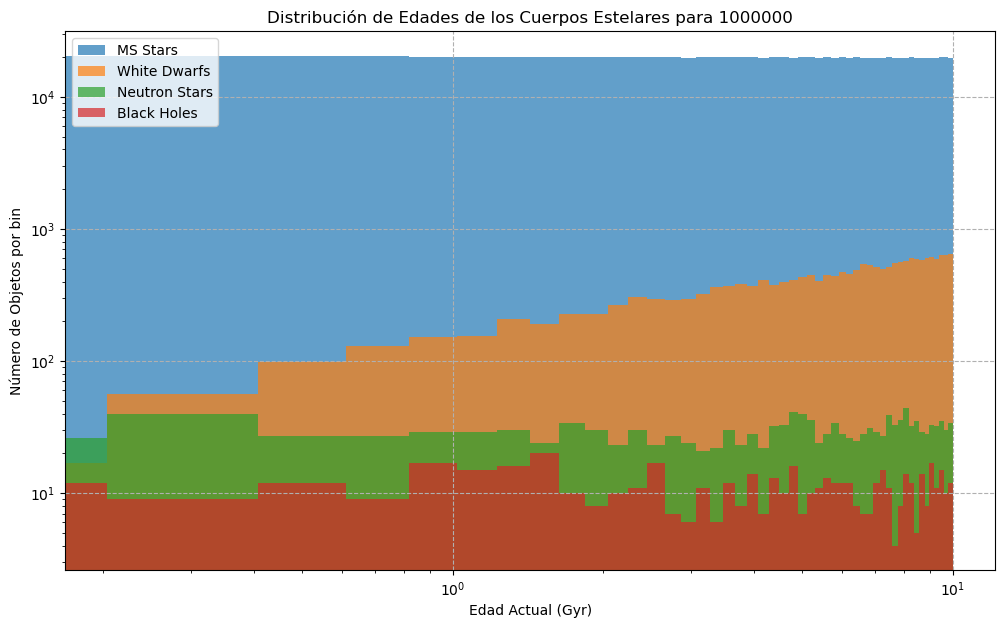

In [ ]:
print("\n--- Generando Gráficos para el Análisis ---")

# === Histograma de Edades ===
plt.figure(figsize=(12, 7))

# Filtramos las edades de cada tipo de objeto
edades_ms = edades_actuales[tipos_de_objetos == 'MS Star']
edades_wd = edades_actuales[tipos_de_objetos == 'White Dwarf']
edades_ns = edades_actuales[tipos_de_objetos == 'Neutron Star']
edades_bh = edades_actuales[tipos_de_objetos == 'Black Hole']

# Usamos bins lineales para las edades
bins_edad = np.linspace(0, 10, 50)

# Graficamos histogramas con transparencia para poder compararlos
plt.hist(edades_ms, bins=bins_edad, alpha=0.7, label='MS Stars')
plt.hist(edades_wd, bins=bins_edad, alpha=0.7, label='White Dwarfs')
plt.hist(edades_ns, bins=bins_edad, alpha=0.7, label='Neutron Stars')
plt.hist(edades_bh, bins=bins_edad, alpha=0.7, label='Black Holes')


plt.title(f'Distribución de Edades de los Cuerpos Estelares para 1000000 Objetos')
plt.xlabel('Edad Actual (Gyr)')
plt.xscale("log")
plt.ylabel('Número de Objetos por bin')
plt.yscale("log")
plt.legend()
plt.grid(True, ls="--")
plt.show()

Ahora el histograma normalizado

Generating 1000000 stellar masses (Salpeter IMF)...
Mass generation complete!

Classifying stellar objects...
Classification complete.

--- FRACTION OF OBJECT TYPES IN THE SIMULATED GALAXY ---

Generating final mass distribution histogram...


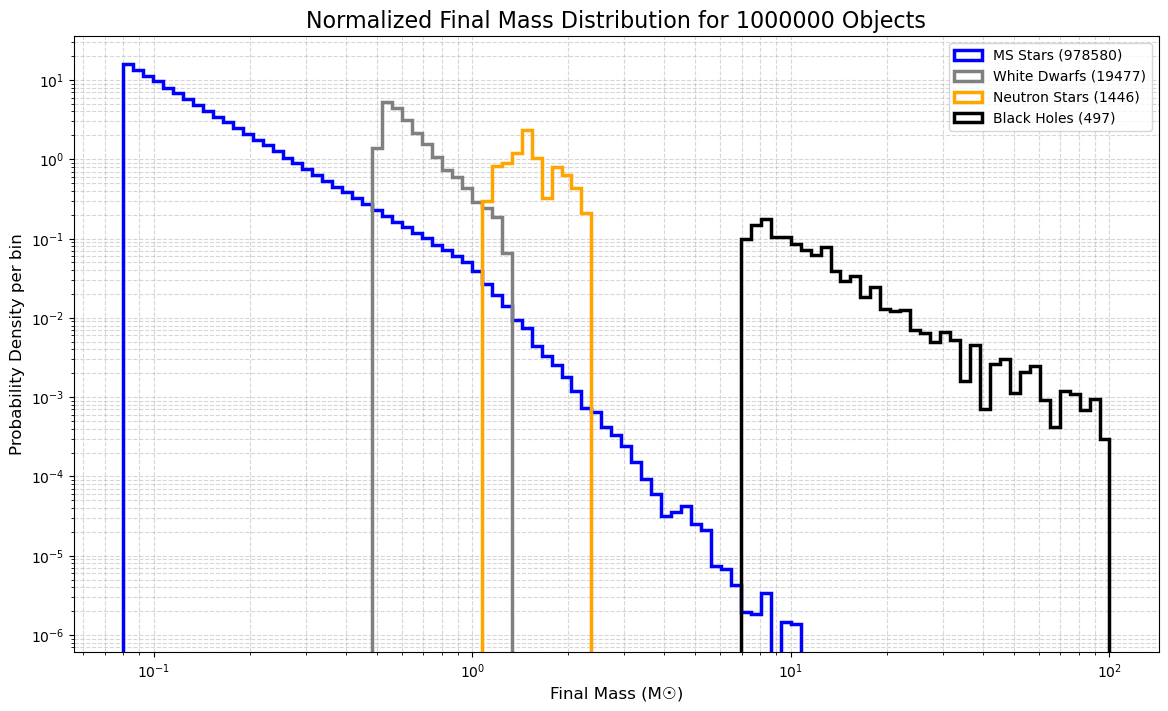


Generating age distribution histogram...


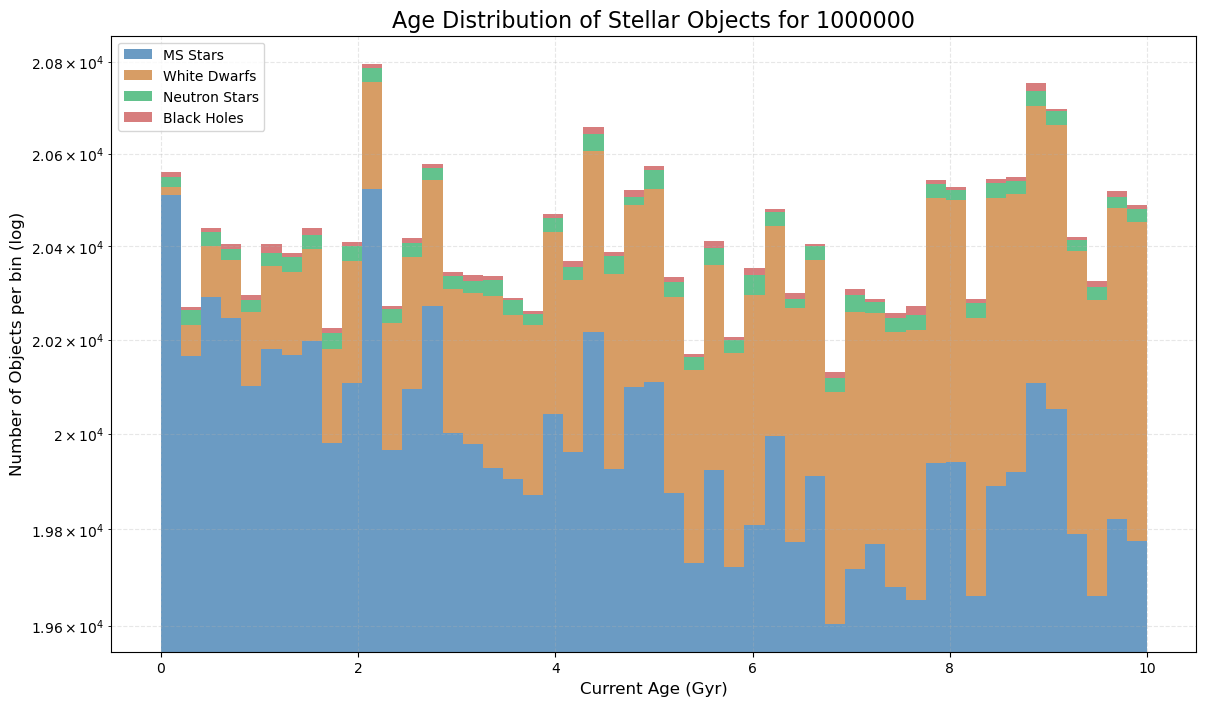


--- Masses of Oldest and Youngest Objects ---

--- MS Star ---
  Mass of the oldest: 0.24 M☉ (Age: 10.00 Gyr)
  Mass of the youngest: 0.12 M☉ (Age: 0.00 Gyr)

--- White Dwarf ---
  Mass of the oldest: 0.57 M☉ (Age: 10.00 Gyr)
  Mass of the youngest: 1.12 M☉ (Age: 0.10 Gyr)

--- Neutron Star ---
  Mass of the oldest: 1.57 M☉ (Age: 9.99 Gyr)
  Mass of the youngest: 1.91 M☉ (Age: 0.03 Gyr)

--- Black Hole ---
  Mass of the oldest: 7.32 M☉ (Age: 9.98 Gyr)
  Mass of the youngest: 8.74 M☉ (Age: 0.03 Gyr)


In [ ]:
def generate_salpeter_masses(n_stars):
    """
    Generates a list of stellar masses following the Salpeter IMF (1955)
    in the range 0.08 to 100 solar masses.
    """
    m_min = 0.08
    m_max = 100.0
    alpha = 2.35
    generated_masses = []
    p_max = m_min**(-alpha)

    print(f"Generating {n_stars} stellar masses (Salpeter IMF)...")
    
    while len(generated_masses) < n_stars:
        n_missing = n_stars - len(generated_masses)
        n_candidates = int(n_missing * 1.5)
        
        candidate_masses = np.random.uniform(m_min, m_max, n_candidates)
        candidate_probs = candidate_masses**(-alpha)
        dice = np.random.uniform(0, p_max, n_candidates)
        
        accepted_masses = candidate_masses[dice < candidate_probs]
        generated_masses.extend(accepted_masses)

    print("Mass generation complete!")
    return np.array(generated_masses[:n_stars])


N_STARS = 1_000_000

# Global parameters
galaxy_age = 10.0  # Gyr

# === Simulation Steps ===
initial_masses = generate_salpeter_masses(N_STARS)
birth_times = np.random.uniform(0.0, galaxy_age, N_STARS)
current_ages = galaxy_age - birth_times

ms_lifetimes = 10.0 / (initial_masses**2.5)
is_ms = current_ages <= ms_lifetimes
is_remnant = ~is_ms

print("\nClassifying stellar objects...")
final_masses = np.zeros(N_STARS)
object_types = np.full(N_STARS, "", dtype='<U12')

final_masses[is_ms] = initial_masses[is_ms]
object_types[is_ms] = 'MS Star'

mask_wd = is_remnant & (initial_masses < 8)
mask_ns = is_remnant & (initial_masses >= 8) & (initial_masses < 20)
mask_bh = is_remnant & (initial_masses >= 20)

final_masses[mask_wd] = 0.109 * initial_masses[mask_wd] + 0.394
object_types[mask_wd] = 'White Dwarf'

m_ns_1 = mask_ns & (initial_masses < 14.75)
m_ini_1 = initial_masses[m_ns_1]
final_masses[m_ns_1] = 2.24 + 0.508*(m_ini_1 - 14.75) + 0.125*(m_ini_1 - 14.75)**2 + 0.011*(m_ini_1 - 14.75)**3

m_ns_2 = mask_ns & (initial_masses >= 14.75)
m_ini_2 = initial_masses[m_ns_2]
final_masses[m_ns_2] = 0.123 + 0.112 * m_ini_2

object_types[mask_ns] = 'Neutron Star'

fej = 0.9
m_ini_bh = initial_masses[mask_bh]
m_bh_core = -2.049 + 0.4140 * m_ini_bh
m_bh_all = (
    15.52 
    - 0.3294*(m_ini_bh - 25.97)
    - 0.02121*(m_ini_bh - 25.97)**2
    + 0.003120*(m_ini_bh - 25.97)**3
)
final_masses[mask_bh] = fej * m_bh_core + (1 - fej) * m_bh_all
object_types[mask_bh] = 'Black Hole'

print("Classification complete.")

# --- TASK 4: NUMERICAL ANALYSIS ---
print("\n--- FRACTION OF OBJECT TYPES IN THE SIMULATED GALAXY ---")
# (Code for calculating fractions can be added here)

# --- TASK 2: HISTOGRAM OF FINAL MASSES ---
print("\nGenerating final mass distribution histogram...")
plt.style.use('default')
plt.figure(figsize=(14, 8))

masses_ms = final_masses[object_types == 'MS Star']
masses_wd = final_masses[object_types == 'White Dwarf']
masses_ns = final_masses[object_types == 'Neutron Star']
masses_bh = final_masses[object_types == 'Black Hole']

mass_bins = np.logspace(np.log10(0.08), np.log10(100), 100)

plt.hist(masses_ms, bins=mass_bins, histtype='step', density=True, linewidth=2.5, label=f'MS Stars ({len(masses_ms)})', color='blue')
plt.hist(masses_wd, bins=mass_bins, histtype='step', density=True, linewidth=2.5, label=f'White Dwarfs ({len(masses_wd)})', color='gray')
plt.hist(masses_ns, bins=mass_bins, histtype='step', density=True, linewidth=2.5, label=f'Neutron Stars ({len(masses_ns)})', color='orange')
plt.hist(masses_bh, bins=mass_bins, histtype='step', density=True, linewidth=2.5, label=f'Black Holes ({len(masses_bh)})', color='black')

plt.xscale('log')
plt.yscale('log')
plt.title(f'Normalized Final Mass Distribution for {N_STARS} Objects', fontsize=16)
plt.xlabel('Final Mass (M☉)', fontsize=12)
plt.ylabel('Probability Density per bin', fontsize=12)
plt.legend()
plt.grid(True, which="both", ls="--", alpha=0.5)
plt.show()

# --- TASK 3: AGE DISTRIBUTION HISTOGRAM ---
print("\nGenerating age distribution histogram...")
plt.figure(figsize=(14, 8))

ages_ms = current_ages[object_types == 'MS Star']
ages_wd = current_ages[object_types == 'White Dwarf']
ages_ns = current_ages[object_types == 'Neutron Star']
ages_bh = current_ages[object_types == 'Black Hole']

age_bins = np.linspace(0, 10, 50)

colors = ['steelblue', 'peru', 'mediumseagreen', 'indianred']
labels = ['MS Stars', 'White Dwarfs', 'Neutron Stars', 'Black Holes']

plt.hist(
    [ages_ms, ages_wd, ages_ns, ages_bh],
    bins=age_bins,
    stacked=True,
    label=labels,
    color=colors,
    alpha=0.8
)

plt.yscale('log')
plt.title(f'Age Distribution of Stellar Objects for {N_STARS}', fontsize=16)
plt.xlabel('Current Age (Gyr)', fontsize=12)
plt.ylabel('Number of Objects per bin (log)', fontsize=12)
plt.legend()
plt.grid(True, which="both", ls="--", alpha=0.3)
plt.show()


print("\n--- Masses of Oldest and Youngest Objects ---")
for obj in ['MS Star', 'White Dwarf', 'Neutron Star', 'Black Hole']:
    mask = object_types == obj
    if np.any(mask):
        ages_of_type = current_ages[mask]
        masses_of_type = final_masses[mask]
        
        idx_oldest = np.argmax(ages_of_type)
        idx_youngest = np.argmin(ages_of_type)
        
        mass_oldest = masses_of_type[idx_oldest]
        mass_youngest = masses_of_type[idx_youngest]
        
        age_oldest = np.max(ages_of_type)
        age_youngest = np.min(ages_of_type)
        
        print(f"\n--- {obj} ---")
        print(f"  Mass of the oldest: {mass_oldest:.2f} M☉ (Age: {age_oldest:.2f} Gyr)")
        print(f"  Mass of the youngest: {mass_youngest:.2f} M☉ (Age: {age_youngest:.2f} Gyr)")


### Para 100.000 Estrellas:

Generando 100000 masas estelares (Salpeter IMF)...
¡Generación de masas completada!

Iniciando Paso 4: Clasificación de remanentes...
Clasificación completada.

--- Composición de la Galaxia Simulada ---
Estrellas de Secuencia Principal: 97867 (97.87%)
Enanas Blancas: 1937 (1.94%)
Estrellas de Neutrones: 144 (0.14%)
Agujeros Negros: 52 (0.05%)

Generando el histograma de distribución de masas finales...


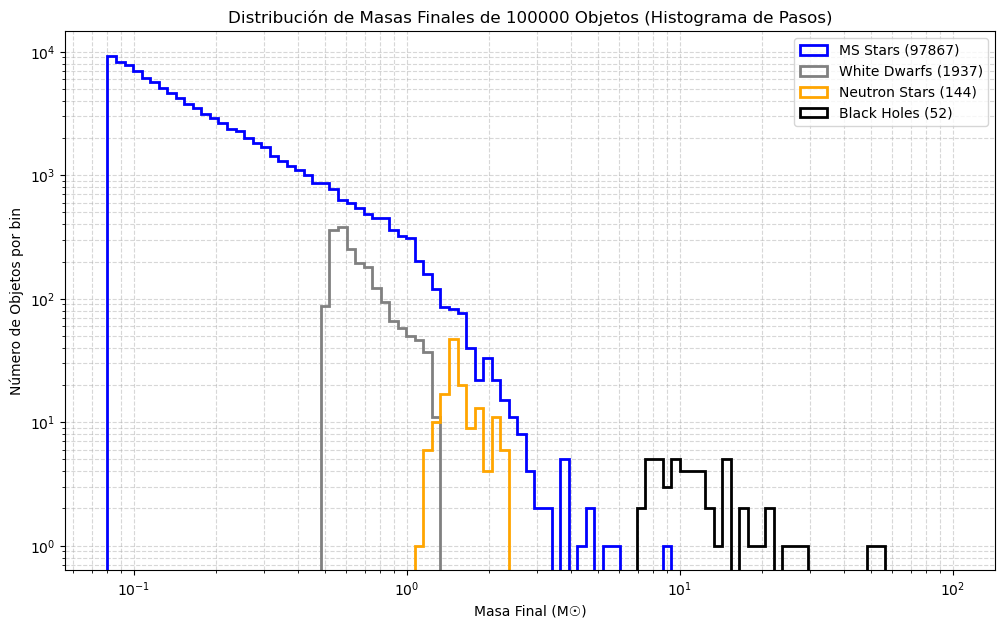

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# --- FUNCIÓN DEL PASO 1 (SIN CAMBIOS) ---
def generar_masas_salpeter(numero_de_estrellas):
    """Genera masas estelares siguiendo la IMF de Salpeter."""
    masa_min = 0.08
    masa_max = 100.0
    alfa = 2.35
    masas_generadas = []
    prob_max = masa_min**(-alfa)

    print(f"Generando {numero_de_estrellas} masas estelares (Salpeter IMF)...")
    
    while len(masas_generadas) < numero_de_estrellas:
        n_necesarias = numero_de_estrellas - len(masas_generadas)
        n_candidatas = int(n_necesarias * 1.5)
        
        masas_candidatas = np.random.uniform(masa_min, masa_max, n_candidatas)
        prob_masas = masas_candidatas**(-alfa)
        dados_virtuales = np.random.uniform(0, prob_max, n_candidatas)
        
        masas_aceptadas = masas_candidatas[dados_virtuales < prob_masas]
        masas_generadas.extend(masas_aceptadas)

    print("¡Generación de masas completada!")
    return np.array(masas_generadas[:numero_de_estrellas])

# --- PROGRAMA PRINCIPAL ---

N_ESTRELLAS = 100000 # Usemos un millón para tener muy buena estadística
edad_galaxia = 10.0  # en Gyr


masas_iniciales = generar_masas_salpeter(N_ESTRELLAS)
tiempos_de_nacimiento = np.random.uniform(0.0, edad_galaxia, N_ESTRELLAS)
edades_actuales = edad_galaxia - tiempos_de_nacimiento
tiempos_de_vida_ms = 10.0 / (masas_iniciales**2.5)
es_ms = edades_actuales <= tiempos_de_vida_ms
es_remanente = ~es_ms # El símbolo ~ significa "not", es la negación de es_ms


print("\nIniciando Paso 4: Clasificación de remanentes...")

# Inicializamos los arrays de resultados
masas_finales = np.zeros(N_ESTRELLAS)
tipos_de_objetos = np.full(N_ESTRELLAS, "", dtype='<U12') 


masas_finales[es_ms] = masas_iniciales[es_ms]
tipos_de_objetos[es_ms] = 'MS Star'


mascara_wd = es_remanente & (masas_iniciales < 8)
mascara_ns = es_remanente & (masas_iniciales >= 8) & (masas_iniciales < 20)
mascara_bh = es_remanente & (masas_iniciales >= 20)


masas_finales[mascara_wd] = 0.109 * masas_iniciales[mascara_wd] + 0.394
tipos_de_objetos[mascara_wd] = 'White Dwarf'

# >> Para ESTRELLAS DE NEUTRONES (NS) - Fórmulas de Raithel et al. (2018)

m_ns_1 = mascara_ns & (masas_iniciales < 14.75) 
m_ini_1 = masas_iniciales[m_ns_1]
masas_finales[m_ns_1] = 2.24 + 0.508*(m_ini_1 - 14.75) + 0.125*(m_ini_1 - 14.75)**2 + 0.011*(m_ini_1 - 14.75)**3


m_ns_2 = mascara_ns & (masas_iniciales >= 14.75)
m_ini_2 = masas_iniciales[m_ns_2]
masas_finales[m_ns_2] = 0.123 + 0.112 * m_ini_2
tipos_de_objetos[mascara_ns] = 'Neutron Star'


# >> Para AGUJEROS NEGROS (BH) - Fórmulas de Raithel et al. (2018) con fej=0.9
fej = 0.9
m_ini_bh = masas_iniciales[mascara_bh]
# M_BH,core (Eq. 1 del paper)
m_bh_core = -2.049 + 0.4140 * m_ini_bh
# M_BH,all (Eq. 2 del paper)
m_bh_all = 15.52 - 0.3294*(m_ini_bh - 25.97) - 0.02121*(m_ini_bh - 25.97)**2 + 0.003120*(m_ini_bh - 25.97)**3
# Fórmula combinada (Eq. 4 del paper)
masas_finales[mascara_bh] = fej * m_bh_core + (1 - fej) * m_bh_all
tipos_de_objetos[mascara_bh] = 'Black Hole'

print("Clasificación completada.")

# --- ANÁLISIS FINAL Y RESULTADOS ---
num_ms = np.sum(tipos_de_objetos == 'MS Star')
num_wd = np.sum(tipos_de_objetos == 'White Dwarf')
num_ns = np.sum(tipos_de_objetos == 'Neutron Star')
num_bh = np.sum(tipos_de_objetos == 'Black Hole')

print("\n--- Composición de la Galaxia Simulada ---")
print(f"Estrellas de Secuencia Principal: {num_ms} ({num_ms/N_ESTRELLAS:.2%})")
print(f"Enanas Blancas: {num_wd} ({num_wd/N_ESTRELLAS:.2%})")
print(f"Estrellas de Neutrones: {num_ns} ({num_ns/N_ESTRELLAS:.2%})")
print(f"Agujeros Negros: {num_bh} ({num_bh/N_ESTRELLAS:.2%})")

# --- VISUALIZACIÓN MEJORADA: HISTOGRAMA DE PASOS ---
print("\nGenerando el histograma de distribución de masas finales...")
plt.figure(figsize=(12, 7))

# Filtramos las masas de cada tipo de objeto para el histograma
masas_ms = masas_finales[tipos_de_objetos == 'MS Star']
masas_wd = masas_finales[tipos_de_objetos == 'White Dwarf']
masas_ns = masas_finales[tipos_de_objetos == 'Neutron Star']
masas_bh = masas_finales[tipos_de_objetos == 'Black Hole']


bins = np.logspace(np.log10(0.08), np.log10(100), 100)

plt.hist(masas_ms, bins=bins, histtype='step', linewidth=2, label=f'MS Stars ({len(masas_ms)})', color='blue')
plt.hist(masas_wd, bins=bins, histtype='step', linewidth=2, label=f'White Dwarfs ({len(masas_wd)})', color='grey')
plt.hist(masas_ns, bins=bins, histtype='step', linewidth=2, label=f'Neutron Stars ({len(masas_ns)})', color='orange')
plt.hist(masas_bh, bins=bins, histtype='step', linewidth=2, label=f'Black Holes ({len(masas_bh)})', color='black')


plt.xscale('log')
plt.yscale('log') 

plt.title(f'Distribución de Masas Finales de {N_ESTRELLAS} Objetos (Histograma de Pasos)')
plt.xlabel('Masa Final (M☉)')
plt.ylabel('Número de Objetos por bin')
plt.legend()
plt.grid(True, which="both", ls="--", alpha=0.5) 
plt.show()


--- Generando Gráficos para el Análisis ---


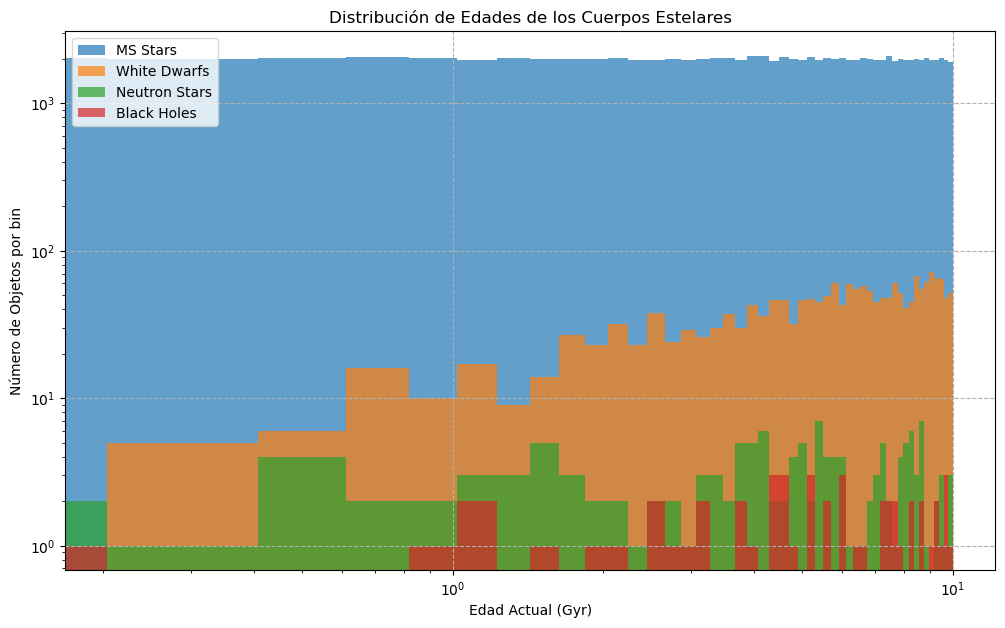

In [ ]:
print("\n--- Generando Gráficos para el Análisis ---")

plt.figure(figsize=(12, 7))

edades_ms = edades_actuales[tipos_de_objetos == 'MS Star']
edades_wd = edades_actuales[tipos_de_objetos == 'White Dwarf']
edades_ns = edades_actuales[tipos_de_objetos == 'Neutron Star']
edades_bh = edades_actuales[tipos_de_objetos == 'Black Hole']


bins_edad = np.linspace(0, 10, 50)

plt.hist(edades_ms, bins=bins_edad, alpha=0.7, label='MS Stars')
plt.hist(edades_wd, bins=bins_edad, alpha=0.7, label='White Dwarfs')
plt.hist(edades_ns, bins=bins_edad, alpha=0.7, label='Neutron Stars')
plt.hist(edades_bh, bins=bins_edad, alpha=0.7, label='Black Holes')


plt.title(f'Distribución de Edades de los Cuerpos Estelares')
plt.xlabel('Edad Actual (Gyr)')
plt.xscale('log')
plt.ylabel('Número de Objetos por bin')
plt.yscale('log')
plt.legend()
plt.grid(True, ls="--")
plt.show()

parte normalizada

Generating 100000 stellar masses (Salpeter IMF)...
Mass generation complete!

Classifying stellar objects...
Classification complete.

--- FRACTION OF OBJECT TYPES IN THE SIMULATED GALAXY ---

Generating final mass distribution histogram...


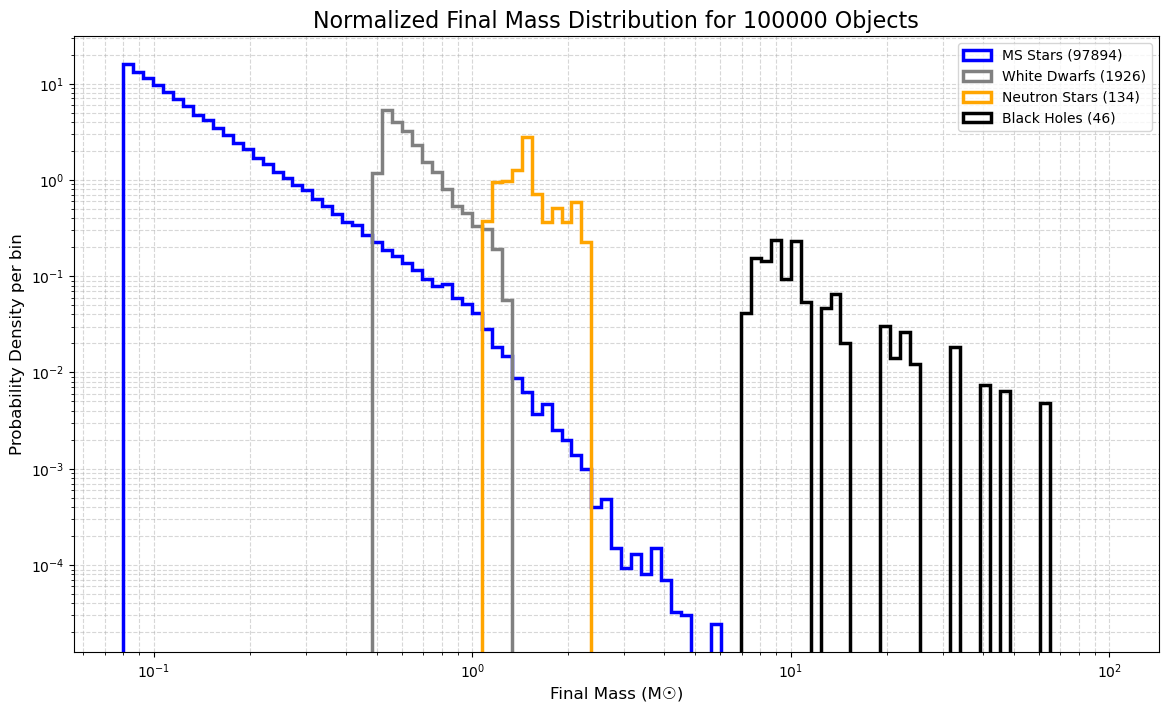


Generating age distribution histogram...


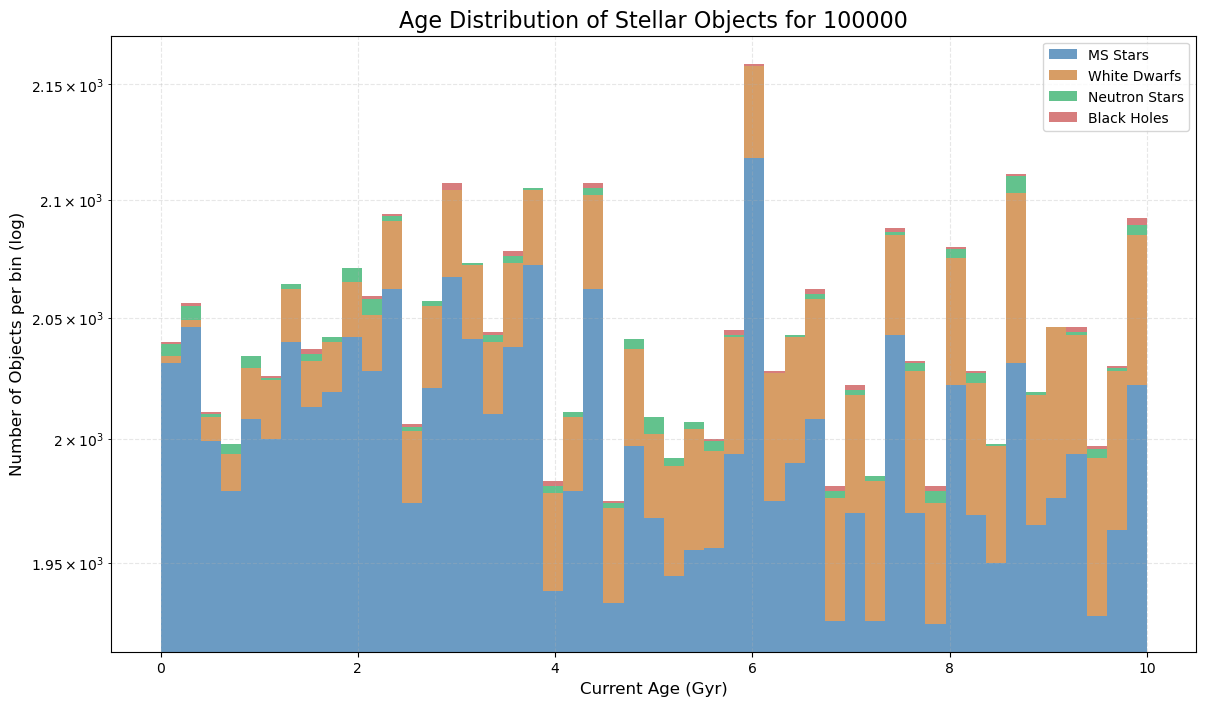


--- Masses of Oldest and Youngest Objects ---

--- MS Star ---
  Mass of the oldest: 0.46 M☉ (Age: 10.00 Gyr)
  Mass of the youngest: 0.10 M☉ (Age: 0.00 Gyr)

--- White Dwarf ---
  Mass of the oldest: 0.52 M☉ (Age: 10.00 Gyr)
  Mass of the youngest: 1.23 M☉ (Age: 0.09 Gyr)

--- Neutron Star ---
  Mass of the oldest: 1.43 M☉ (Age: 9.93 Gyr)
  Mass of the youngest: 2.12 M☉ (Age: 0.01 Gyr)

--- Black Hole ---
  Mass of the oldest: 7.66 M☉ (Age: 9.96 Gyr)
  Mass of the youngest: 7.48 M☉ (Age: 0.03 Gyr)


In [ ]:
def generate_salpeter_masses(n_stars):
    """
    Generates a list of stellar masses following the Salpeter IMF (1955)
    in the range 0.08 to 100 solar masses.
    """
    m_min = 0.08
    m_max = 100.0
    alpha = 2.35
    generated_masses = []
    p_max = m_min**(-alpha)

    print(f"Generating {n_stars} stellar masses (Salpeter IMF)...")
    
    while len(generated_masses) < n_stars:
        n_missing = n_stars - len(generated_masses)
        n_candidates = int(n_missing * 1.5)
        
        candidate_masses = np.random.uniform(m_min, m_max, n_candidates)
        candidate_probs = candidate_masses**(-alpha)
        dice = np.random.uniform(0, p_max, n_candidates)
        
        accepted_masses = candidate_masses[dice < candidate_probs]
        generated_masses.extend(accepted_masses)

    print("Mass generation complete!")
    return np.array(generated_masses[:n_stars])

N_STARS = 100000

# Global parameters
galaxy_age = 10.0  # Gyr

initial_masses = generate_salpeter_masses(N_STARS)
birth_times = np.random.uniform(0.0, galaxy_age, N_STARS)
current_ages = galaxy_age - birth_times

ms_lifetimes = 10.0 / (initial_masses**2.5)
is_ms = current_ages <= ms_lifetimes
is_remnant = ~is_ms

print("\nClassifying stellar objects...")
final_masses = np.zeros(N_STARS)
object_types = np.full(N_STARS, "", dtype='<U12')

final_masses[is_ms] = initial_masses[is_ms]
object_types[is_ms] = 'MS Star'

mask_wd = is_remnant & (initial_masses < 8)
mask_ns = is_remnant & (initial_masses >= 8) & (initial_masses < 20)
mask_bh = is_remnant & (initial_masses >= 20)

final_masses[mask_wd] = 0.109 * initial_masses[mask_wd] + 0.394
object_types[mask_wd] = 'White Dwarf'

m_ns_1 = mask_ns & (initial_masses < 14.75)
m_ini_1 = initial_masses[m_ns_1]
final_masses[m_ns_1] = 2.24 + 0.508*(m_ini_1 - 14.75) + 0.125*(m_ini_1 - 14.75)**2 + 0.011*(m_ini_1 - 14.75)**3

m_ns_2 = mask_ns & (initial_masses >= 14.75)
m_ini_2 = initial_masses[m_ns_2]
final_masses[m_ns_2] = 0.123 + 0.112 * m_ini_2

object_types[mask_ns] = 'Neutron Star'

fej = 0.9
m_ini_bh = initial_masses[mask_bh]
m_bh_core = -2.049 + 0.4140 * m_ini_bh
m_bh_all = (
    15.52 
    - 0.3294*(m_ini_bh - 25.97)
    - 0.02121*(m_ini_bh - 25.97)**2
    + 0.003120*(m_ini_bh - 25.97)**3
)
final_masses[mask_bh] = fej * m_bh_core + (1 - fej) * m_bh_all
object_types[mask_bh] = 'Black Hole'

print("Classification complete.")


print("\n--- FRACTION OF OBJECT TYPES IN THE SIMULATED GALAXY ---")

print("\nGenerating final mass distribution histogram...")
plt.style.use('default')
plt.figure(figsize=(14, 8))

masses_ms = final_masses[object_types == 'MS Star']
masses_wd = final_masses[object_types == 'White Dwarf']
masses_ns = final_masses[object_types == 'Neutron Star']
masses_bh = final_masses[object_types == 'Black Hole']

mass_bins = np.logspace(np.log10(0.08), np.log10(100), 100)

plt.hist(masses_ms, bins=mass_bins, histtype='step', density=True, linewidth=2.5, label=f'MS Stars ({len(masses_ms)})', color='blue')
plt.hist(masses_wd, bins=mass_bins, histtype='step', density=True, linewidth=2.5, label=f'White Dwarfs ({len(masses_wd)})', color='gray')
plt.hist(masses_ns, bins=mass_bins, histtype='step', density=True, linewidth=2.5, label=f'Neutron Stars ({len(masses_ns)})', color='orange')
plt.hist(masses_bh, bins=mass_bins, histtype='step', density=True, linewidth=2.5, label=f'Black Holes ({len(masses_bh)})', color='black')

plt.xscale('log')
plt.yscale('log')
plt.title(f'Normalized Final Mass Distribution for {N_STARS} Objects', fontsize=16)
plt.xlabel('Final Mass (M☉)', fontsize=12)
plt.ylabel('Probability Density per bin', fontsize=12)
plt.legend()
plt.grid(True, which="both", ls="--", alpha=0.5)
plt.show()

# --- TASK 3: AGE DISTRIBUTION HISTOGRAM ---
print("\nGenerating age distribution histogram...")
plt.figure(figsize=(14, 8))

ages_ms = current_ages[object_types == 'MS Star']
ages_wd = current_ages[object_types == 'White Dwarf']
ages_ns = current_ages[object_types == 'Neutron Star']
ages_bh = current_ages[object_types == 'Black Hole']

age_bins = np.linspace(0, 10, 50)

colors = ['steelblue', 'peru', 'mediumseagreen', 'indianred']
labels = ['MS Stars', 'White Dwarfs', 'Neutron Stars', 'Black Holes']

plt.hist(
    [ages_ms, ages_wd, ages_ns, ages_bh],
    bins=age_bins,
    stacked=True,
    label=labels,
    color=colors,
    alpha=0.8
)

plt.yscale('log')
plt.title(f'Age Distribution of Stellar Objects for {N_STARS}', fontsize=16)
plt.xlabel('Current Age (Gyr)', fontsize=12)
plt.ylabel('Number of Objects per bin (log)', fontsize=12)
plt.legend()
plt.grid(True, which="both", ls="--", alpha=0.3)
plt.show()


print("\n--- Masses of Oldest and Youngest Objects ---")
for obj in ['MS Star', 'White Dwarf', 'Neutron Star', 'Black Hole']:
    mask = object_types == obj
    if np.any(mask):
        ages_of_type = current_ages[mask]
        masses_of_type = final_masses[mask]
        
        idx_oldest = np.argmax(ages_of_type)
        idx_youngest = np.argmin(ages_of_type)
        
        mass_oldest = masses_of_type[idx_oldest]
        mass_youngest = masses_of_type[idx_youngest]
        
        age_oldest = np.max(ages_of_type)
        age_youngest = np.min(ages_of_type)
        
        print(f"\n--- {obj} ---")
        print(f"  Mass of the oldest: {mass_oldest:.2f} M☉ (Age: {age_oldest:.2f} Gyr)")
        print(f"  Mass of the youngest: {mass_youngest:.2f} M☉ (Age: {age_youngest:.2f} Gyr)")

### Para 10.000 Estrellas:

Generando 10000 masas estelares (Salpeter IMF)...
¡Generación de masas completada!

Iniciando Paso 4: Clasificación de remanentes...
Clasificación completada.

--- Composición de la Galaxia Simulada ---
Estrellas de Secuencia Principal: 9784 (97.84%)
Enanas Blancas: 200 (2.00%)
Estrellas de Neutrones: 9 (0.09%)
Agujeros Negros: 7 (0.07%)

Generando el histograma de distribución de masas finales...


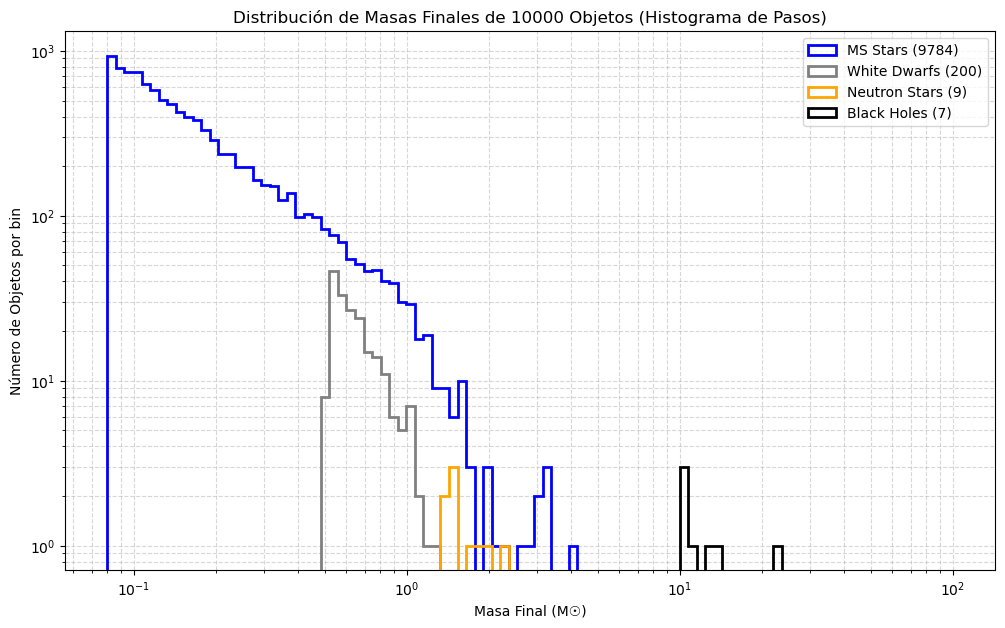

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


def generar_masas_salpeter(numero_de_estrellas):
    """Genera masas estelares siguiendo la IMF de Salpeter."""
    masa_min = 0.08
    masa_max = 100.0
    alfa = 2.35
    masas_generadas = []
    prob_max = masa_min**(-alfa)

    print(f"Generando {numero_de_estrellas} masas estelares (Salpeter IMF)...")
    
    while len(masas_generadas) < numero_de_estrellas:
        n_necesarias = numero_de_estrellas - len(masas_generadas)
        n_candidatas = int(n_necesarias * 1.5)
        
        masas_candidatas = np.random.uniform(masa_min, masa_max, n_candidatas)
        prob_masas = masas_candidatas**(-alfa)
        dados_virtuales = np.random.uniform(0, prob_max, n_candidatas)
        
        masas_aceptadas = masas_candidatas[dados_virtuales < prob_masas]
        masas_generadas.extend(masas_aceptadas)

    print("¡Generación de masas completada!")
    return np.array(masas_generadas[:numero_de_estrellas])



N_ESTRELLAS = 10000 # Usemos un millón para tener muy buena estadística
edad_galaxia = 10.0  # en Gyr


masas_iniciales = generar_masas_salpeter(N_ESTRELLAS)
tiempos_de_nacimiento = np.random.uniform(0.0, edad_galaxia, N_ESTRELLAS)
edades_actuales = edad_galaxia - tiempos_de_nacimiento
tiempos_de_vida_ms = 10.0 / (masas_iniciales**2.5)
es_ms = edades_actuales <= tiempos_de_vida_ms
es_remanente = ~es_ms # El símbolo ~ significa "not", es la negación de es_ms


print("\nIniciando Paso 4: Clasificación de remanentes...")


masas_finales = np.zeros(N_ESTRELLAS)
tipos_de_objetos = np.full(N_ESTRELLAS, "", dtype='<U12') # U12 es un string de hasta 12 caracteres


masas_finales[es_ms] = masas_iniciales[es_ms]
tipos_de_objetos[es_ms] = 'MS Star'


mascara_wd = es_remanente & (masas_iniciales < 8)
mascara_ns = es_remanente & (masas_iniciales >= 8) & (masas_iniciales < 20)
mascara_bh = es_remanente & (masas_iniciales >= 20)


masas_finales[mascara_wd] = 0.109 * masas_iniciales[mascara_wd] + 0.394
tipos_de_objetos[mascara_wd] = 'White Dwarf'

m_ns_1 = mascara_ns & (masas_iniciales < 14.75) 
m_ini_1 = masas_iniciales[m_ns_1]
masas_finales[m_ns_1] = 2.24 + 0.508*(m_ini_1 - 14.75) + 0.125*(m_ini_1 - 14.75)**2 + 0.011*(m_ini_1 - 14.75)**3


m_ns_2 = mascara_ns & (masas_iniciales >= 14.75)
m_ini_2 = masas_iniciales[m_ns_2]
masas_finales[m_ns_2] = 0.123 + 0.112 * m_ini_2
tipos_de_objetos[mascara_ns] = 'Neutron Star'


# >> Para AGUJEROS NEGROS (BH) - Fórmulas de Raithel et al. (2018) con fej=0.9
fej = 0.9
m_ini_bh = masas_iniciales[mascara_bh]
# M_BH,core (Eq. 1 del paper)
m_bh_core = -2.049 + 0.4140 * m_ini_bh
# M_BH,all (Eq. 2 del paper)
m_bh_all = 15.52 - 0.3294*(m_ini_bh - 25.97) - 0.02121*(m_ini_bh - 25.97)**2 + 0.003120*(m_ini_bh - 25.97)**3
# Fórmula combinada (Eq. 4 del paper)
masas_finales[mascara_bh] = fej * m_bh_core + (1 - fej) * m_bh_all
tipos_de_objetos[mascara_bh] = 'Black Hole'

print("Clasificación completada.")

# --- ANÁLISIS FINAL Y RESULTADOS ---
num_ms = np.sum(tipos_de_objetos == 'MS Star')
num_wd = np.sum(tipos_de_objetos == 'White Dwarf')
num_ns = np.sum(tipos_de_objetos == 'Neutron Star')
num_bh = np.sum(tipos_de_objetos == 'Black Hole')

print("\n--- Composición de la Galaxia Simulada ---")
print(f"Estrellas de Secuencia Principal: {num_ms} ({num_ms/N_ESTRELLAS:.2%})")
print(f"Enanas Blancas: {num_wd} ({num_wd/N_ESTRELLAS:.2%})")
print(f"Estrellas de Neutrones: {num_ns} ({num_ns/N_ESTRELLAS:.2%})")
print(f"Agujeros Negros: {num_bh} ({num_bh/N_ESTRELLAS:.2%})")

# --- VISUALIZACIÓN MEJORADA: HISTOGRAMA DE PASOS ---
print("\nGenerando el histograma de distribución de masas finales...")
plt.figure(figsize=(12, 7))

# Filtramos las masas de cada tipo de objeto para el histograma
masas_ms = masas_finales[tipos_de_objetos == 'MS Star']
masas_wd = masas_finales[tipos_de_objetos == 'White Dwarf']
masas_ns = masas_finales[tipos_de_objetos == 'Neutron Star']
masas_bh = masas_finales[tipos_de_objetos == 'Black Hole']

# Definimos los bins logarítmicos que ya tenías
bins = np.logspace(np.log10(0.08), np.log10(100), 100)

plt.hist(masas_ms, bins=bins, histtype='step', linewidth=2, label=f'MS Stars ({len(masas_ms)})', color='blue')
plt.hist(masas_wd, bins=bins, histtype='step', linewidth=2, label=f'White Dwarfs ({len(masas_wd)})', color='grey')
plt.hist(masas_ns, bins=bins, histtype='step', linewidth=2, label=f'Neutron Stars ({len(masas_ns)})', color='orange')
plt.hist(masas_bh, bins=bins, histtype='step', linewidth=2, label=f'Black Holes ({len(masas_bh)})', color='black')

# Las escalas logarítmicas son cruciales y ya las estabas usando correctamente
plt.xscale('log')
plt.yscale('log') 

plt.title(f'Distribución de Masas Finales de {N_ESTRELLAS} Objetos (Histograma de Pasos)')
plt.xlabel('Masa Final (M☉)')
plt.ylabel('Número de Objetos por bin')
plt.legend()
plt.grid(True, which="both", ls="--", alpha=0.5) 
plt.show()


--- Generando Gráficos para el Análisis ---


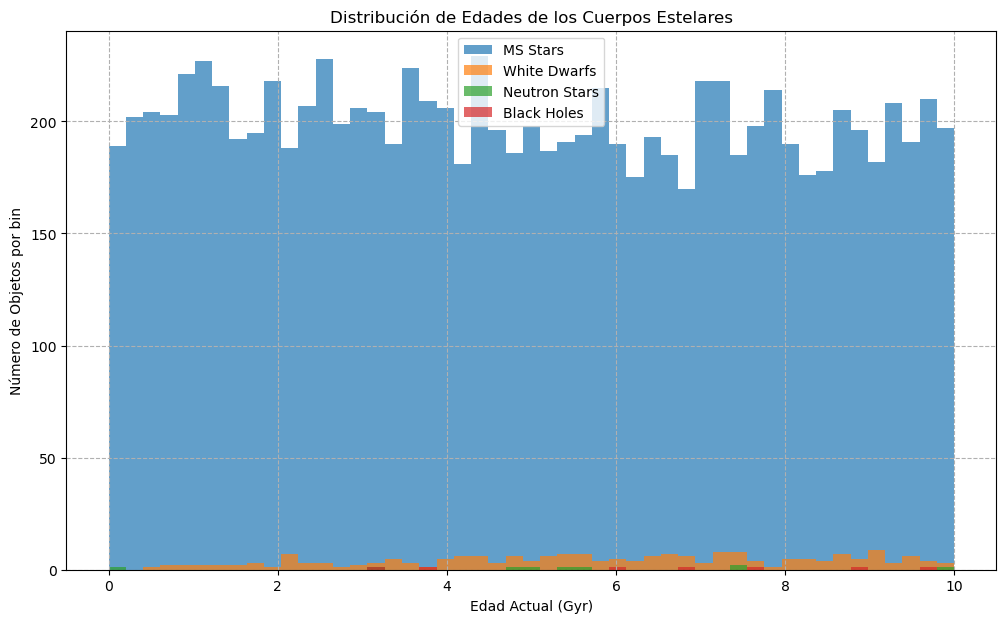

In [ ]:


print("\n--- Generando Gráficos para el Análisis ---")

# === Histograma de Edades ===
plt.figure(figsize=(12, 7))

edades_ms = edades_actuales[tipos_de_objetos == 'MS Star']
edades_wd = edades_actuales[tipos_de_objetos == 'White Dwarf']
edades_ns = edades_actuales[tipos_de_objetos == 'Neutron Star']
edades_bh = edades_actuales[tipos_de_objetos == 'Black Hole']

bins_edad = np.linspace(0, 10, 50)

plt.hist(edades_ms, bins=bins_edad, alpha=0.7, label='MS Stars')
plt.hist(edades_wd, bins=bins_edad, alpha=0.7, label='White Dwarfs')
plt.hist(edades_ns, bins=bins_edad, alpha=0.7, label='Neutron Stars')
plt.hist(edades_bh, bins=bins_edad, alpha=0.7, label='Black Holes')


plt.title(f'Distribución de Edades de los Cuerpos Estelares')
plt.xlabel('Edad Actual (Gyr)')
plt.ylabel('Número de Objetos por bin')
plt.legend()
plt.grid(True, ls="--")
plt.show()

normalizado

Generating 10000 stellar masses (Salpeter IMF)...
Mass generation complete!

Classifying stellar objects...
Classification complete.

--- FRACTION OF OBJECT TYPES IN THE SIMULATED GALAXY ---

Generating final mass distribution histogram...


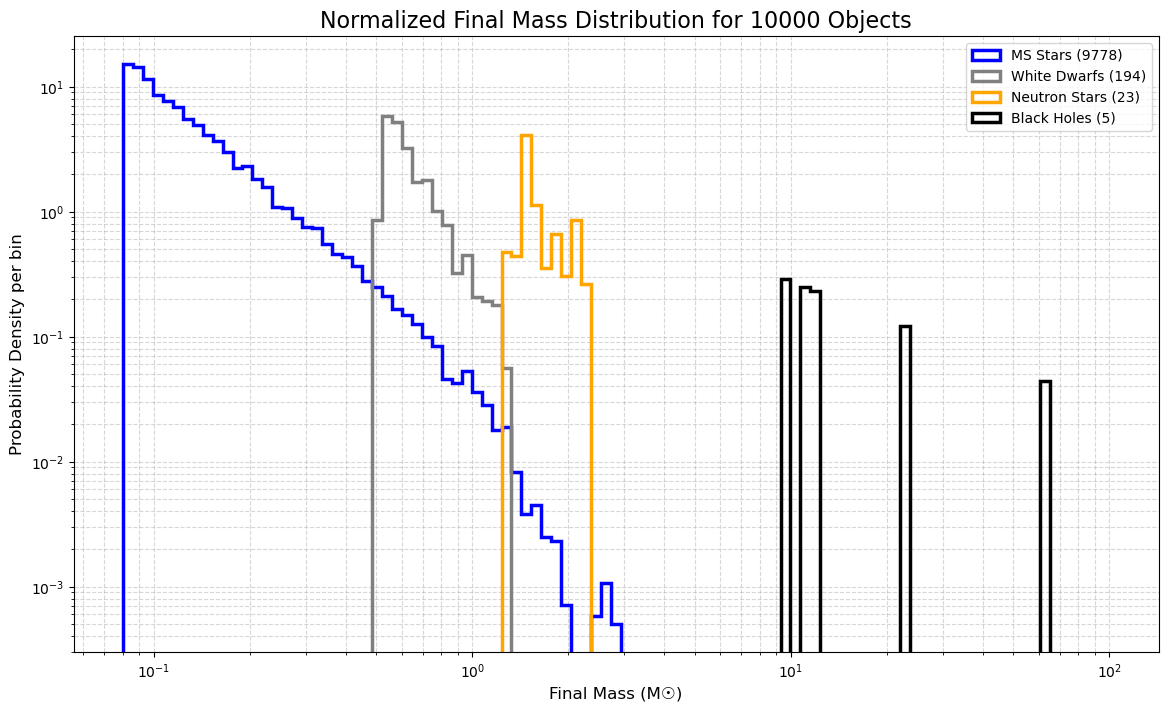


Generating age distribution histogram...


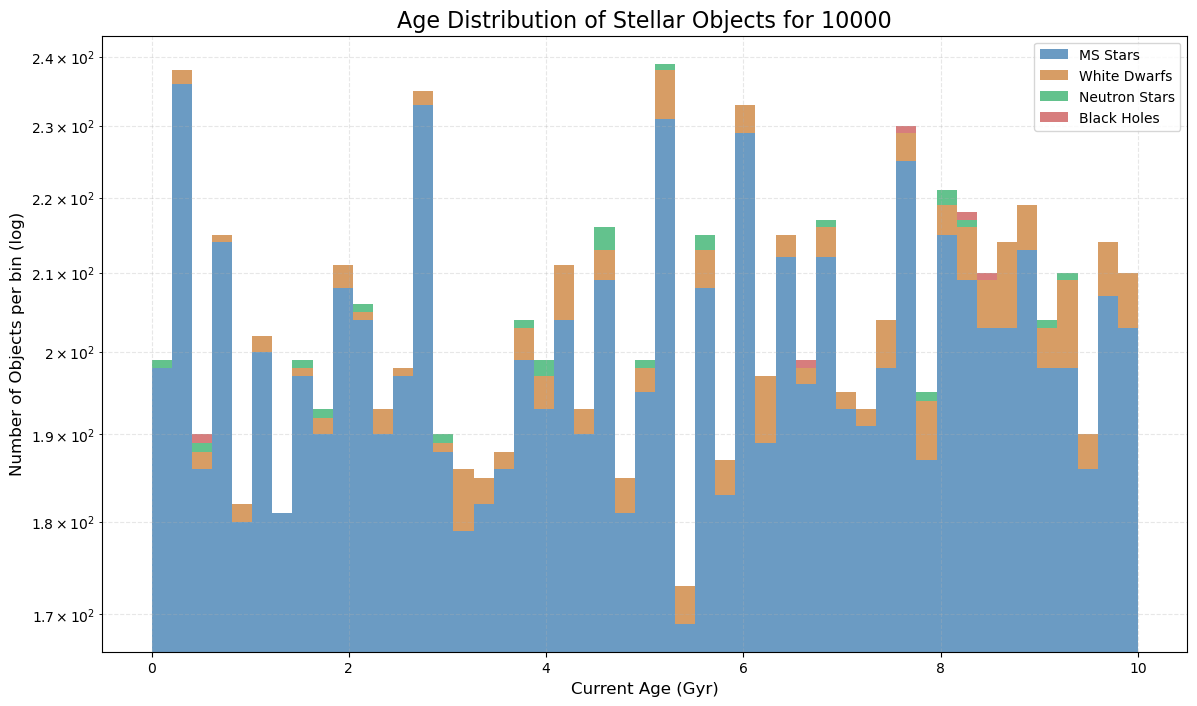


--- Masses of Oldest and Youngest Objects ---

--- MS Star ---
  Mass of the oldest: 0.20 M☉ (Age: 10.00 Gyr)
  Mass of the youngest: 0.12 M☉ (Age: 0.00 Gyr)

--- White Dwarf ---
  Mass of the oldest: 0.94 M☉ (Age: 9.97 Gyr)
  Mass of the youngest: 0.99 M☉ (Age: 0.26 Gyr)

--- Neutron Star ---
  Mass of the oldest: 1.50 M☉ (Age: 9.36 Gyr)
  Mass of the youngest: 1.50 M☉ (Age: 0.08 Gyr)

--- Black Hole ---
  Mass of the oldest: 61.86 M☉ (Age: 8.38 Gyr)
  Mass of the youngest: 11.15 M☉ (Age: 0.46 Gyr)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def generate_salpeter_masses(n_stars):
    """
    Generates a list of stellar masses following the Salpeter IMF (1955)
    in the range 0.08 to 100 solar masses.
    """
    m_min = 0.08
    m_max = 100.0
    alpha = 2.35
    generated_masses = []
    p_max = m_min**(-alpha)

    print(f"Generating {n_stars} stellar masses (Salpeter IMF)...")
    
    while len(generated_masses) < n_stars:
        n_missing = n_stars - len(generated_masses)
        n_candidates = int(n_missing * 1.5)
        
        candidate_masses = np.random.uniform(m_min, m_max, n_candidates)
        candidate_probs = candidate_masses**(-alpha)
        dice = np.random.uniform(0, p_max, n_candidates)
        
        accepted_masses = candidate_masses[dice < candidate_probs]
        generated_masses.extend(accepted_masses)

    print("Mass generation complete!")
    return np.array(generated_masses[:n_stars])


N_STARS = 10000

# Global parameters
galaxy_age = 10.0  # Gyr

# === Simulation Steps ===
initial_masses = generate_salpeter_masses(N_STARS)
birth_times = np.random.uniform(0.0, galaxy_age, N_STARS)
current_ages = galaxy_age - birth_times

ms_lifetimes = 10.0 / (initial_masses**2.5)
is_ms = current_ages <= ms_lifetimes
is_remnant = ~is_ms

print("\nClassifying stellar objects...")
final_masses = np.zeros(N_STARS)
object_types = np.full(N_STARS, "", dtype='<U12')

final_masses[is_ms] = initial_masses[is_ms]
object_types[is_ms] = 'MS Star'

mask_wd = is_remnant & (initial_masses < 8)
mask_ns = is_remnant & (initial_masses >= 8) & (initial_masses < 20)
mask_bh = is_remnant & (initial_masses >= 20)

final_masses[mask_wd] = 0.109 * initial_masses[mask_wd] + 0.394
object_types[mask_wd] = 'White Dwarf'

m_ns_1 = mask_ns & (initial_masses < 14.75)
m_ini_1 = initial_masses[m_ns_1]
final_masses[m_ns_1] = 2.24 + 0.508*(m_ini_1 - 14.75) + 0.125*(m_ini_1 - 14.75)**2 + 0.011*(m_ini_1 - 14.75)**3

m_ns_2 = mask_ns & (initial_masses >= 14.75)
m_ini_2 = initial_masses[m_ns_2]
final_masses[m_ns_2] = 0.123 + 0.112 * m_ini_2

object_types[mask_ns] = 'Neutron Star'

fej = 0.9
m_ini_bh = initial_masses[mask_bh]
m_bh_core = -2.049 + 0.4140 * m_ini_bh
m_bh_all = (
    15.52 
    - 0.3294*(m_ini_bh - 25.97)
    - 0.02121*(m_ini_bh - 25.97)**2
    + 0.003120*(m_ini_bh - 25.97)**3
)
final_masses[mask_bh] = fej * m_bh_core + (1 - fej) * m_bh_all
object_types[mask_bh] = 'Black Hole'

print("Classification complete.")

print("\n--- FRACTION OF OBJECT TYPES IN THE SIMULATED GALAXY ---")



print("\nGenerating final mass distribution histogram...")
plt.style.use('default')
plt.figure(figsize=(14, 8))

masses_ms = final_masses[object_types == 'MS Star']
masses_wd = final_masses[object_types == 'White Dwarf']
masses_ns = final_masses[object_types == 'Neutron Star']
masses_bh = final_masses[object_types == 'Black Hole']

mass_bins = np.logspace(np.log10(0.08), np.log10(100), 100)

plt.hist(masses_ms, bins=mass_bins, histtype='step', density=True, linewidth=2.5, label=f'MS Stars ({len(masses_ms)})', color='blue')
plt.hist(masses_wd, bins=mass_bins, histtype='step', density=True, linewidth=2.5, label=f'White Dwarfs ({len(masses_wd)})', color='gray')
plt.hist(masses_ns, bins=mass_bins, histtype='step', density=True, linewidth=2.5, label=f'Neutron Stars ({len(masses_ns)})', color='orange')
plt.hist(masses_bh, bins=mass_bins, histtype='step', density=True, linewidth=2.5, label=f'Black Holes ({len(masses_bh)})', color='black')

plt.xscale('log')
plt.yscale('log')
plt.title(f'Normalized Final Mass Distribution for {N_STARS} Objects', fontsize=16)
plt.xlabel('Final Mass (M☉)', fontsize=12)
plt.ylabel('Probability Density per bin', fontsize=12)
plt.legend()
plt.grid(True, which="both", ls="--", alpha=0.5)
plt.show()

print("\nGenerating age distribution histogram...")
plt.figure(figsize=(14, 8))

ages_ms = current_ages[object_types == 'MS Star']
ages_wd = current_ages[object_types == 'White Dwarf']
ages_ns = current_ages[object_types == 'Neutron Star']
ages_bh = current_ages[object_types == 'Black Hole']

age_bins = np.linspace(0, 10, 50)

colors = ['steelblue', 'peru', 'mediumseagreen', 'indianred']
labels = ['MS Stars', 'White Dwarfs', 'Neutron Stars', 'Black Holes']

plt.hist(
    [ages_ms, ages_wd, ages_ns, ages_bh],
    bins=age_bins,
    stacked=True,
    label=labels,
    color=colors,
    alpha=0.8
)

plt.yscale('log')
plt.title(f'Age Distribution of Stellar Objects for {N_STARS}', fontsize=16)
plt.xlabel('Current Age (Gyr)', fontsize=12)
plt.ylabel('Number of Objects per bin (log)', fontsize=12)
plt.legend()
plt.grid(True, which="both", ls="--", alpha=0.3)
plt.show()

print("\n--- Masses of Oldest and Youngest Objects ---")
for obj in ['MS Star', 'White Dwarf', 'Neutron Star', 'Black Hole']:
    mask = object_types == obj
    if np.any(mask):
        ages_of_type = current_ages[mask]
        masses_of_type = final_masses[mask]
        
        idx_oldest = np.argmax(ages_of_type)
        idx_youngest = np.argmin(ages_of_type)
        
        mass_oldest = masses_of_type[idx_oldest]
        mass_youngest = masses_of_type[idx_youngest]
        
        age_oldest = np.max(ages_of_type)
        age_youngest = np.min(ages_of_type)
        
        print(f"\n--- {obj} ---")
        print(f"  Mass of the oldest: {mass_oldest:.2f} M☉ (Age: {age_oldest:.2f} Gyr)")
        print(f"  Mass of the youngest: {mass_youngest:.2f} M☉ (Age: {age_youngest:.2f} Gyr)")


### Para 1.000 Estrellas:

Generando 1000 masas estelares (Salpeter IMF)...
¡Generación de masas completada!

Iniciando Paso 4: Clasificación de remanentes...
Clasificación completada.

--- Composición de la Galaxia Simulada ---
Estrellas de Secuencia Principal: 980 (98.00%)
Enanas Blancas: 19 (1.90%)
Estrellas de Neutrones: 1 (0.10%)
Agujeros Negros: 0 (0.00%)

Generando el histograma de distribución de masas finales...


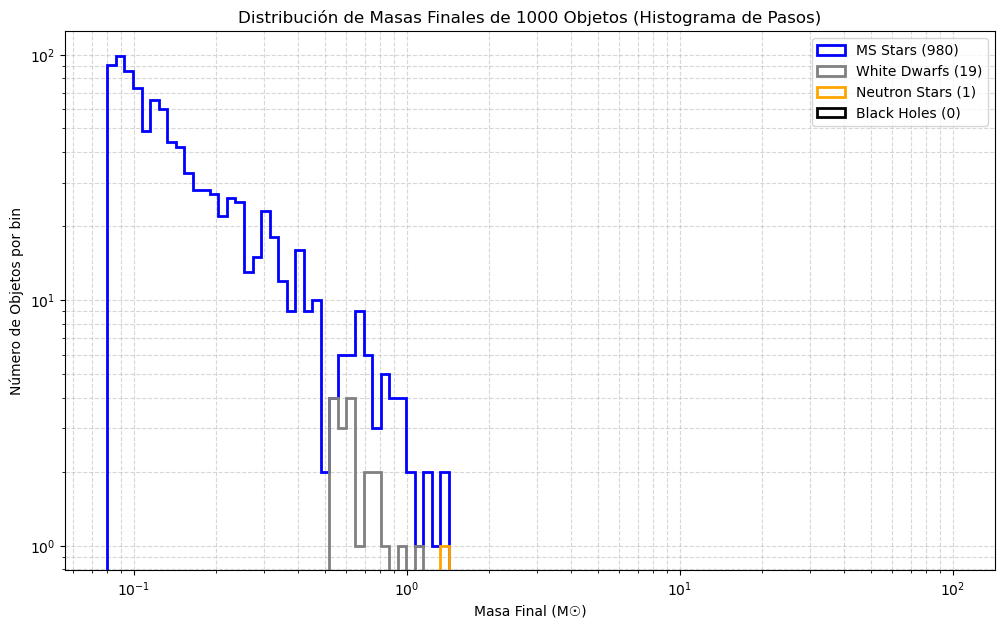

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def generar_masas_salpeter(numero_de_estrellas):
    """Genera masas estelares siguiendo la IMF de Salpeter."""
    masa_min = 0.08
    masa_max = 100.0
    alfa = 2.35
    masas_generadas = []
    prob_max = masa_min**(-alfa)

    print(f"Generando {numero_de_estrellas} masas estelares (Salpeter IMF)...")
    
    while len(masas_generadas) < numero_de_estrellas:
        n_necesarias = numero_de_estrellas - len(masas_generadas)
        n_candidatas = int(n_necesarias * 1.5)
        
        masas_candidatas = np.random.uniform(masa_min, masa_max, n_candidatas)
        prob_masas = masas_candidatas**(-alfa)
        dados_virtuales = np.random.uniform(0, prob_max, n_candidatas)
        
        masas_aceptadas = masas_candidatas[dados_virtuales < prob_masas]
        masas_generadas.extend(masas_aceptadas)

    print("¡Generación de masas completada!")
    return np.array(masas_generadas[:numero_de_estrellas])



N_ESTRELLAS = 1000 # Usemos un millón para tener muy buena estadística
edad_galaxia = 10.0  # en Gyr


masas_iniciales = generar_masas_salpeter(N_ESTRELLAS)
tiempos_de_nacimiento = np.random.uniform(0.0, edad_galaxia, N_ESTRELLAS)
edades_actuales = edad_galaxia - tiempos_de_nacimiento
tiempos_de_vida_ms = 10.0 / (masas_iniciales**2.5)
es_ms = edades_actuales <= tiempos_de_vida_ms
es_remanente = ~es_ms # El símbolo ~ significa "not", es la negación de es_ms


print("\nIniciando Paso 4: Clasificación de remanentes...")

masas_finales = np.zeros(N_ESTRELLAS)
tipos_de_objetos = np.full(N_ESTRELLAS, "", dtype='<U12') # U12 es un string de hasta 12 caracteres


masas_finales[es_ms] = masas_iniciales[es_ms]
tipos_de_objetos[es_ms] = 'MS Star'


mascara_wd = es_remanente & (masas_iniciales < 8)
mascara_ns = es_remanente & (masas_iniciales >= 8) & (masas_iniciales < 20)
mascara_bh = es_remanente & (masas_iniciales >= 20)


masas_finales[mascara_wd] = 0.109 * masas_iniciales[mascara_wd] + 0.394
tipos_de_objetos[mascara_wd] = 'White Dwarf'


m_ns_1 = mascara_ns & (masas_iniciales < 14.75) 
m_ini_1 = masas_iniciales[m_ns_1]
masas_finales[m_ns_1] = 2.24 + 0.508*(m_ini_1 - 14.75) + 0.125*(m_ini_1 - 14.75)**2 + 0.011*(m_ini_1 - 14.75)**3


m_ns_2 = mascara_ns & (masas_iniciales >= 14.75)
m_ini_2 = masas_iniciales[m_ns_2]
masas_finales[m_ns_2] = 0.123 + 0.112 * m_ini_2
tipos_de_objetos[mascara_ns] = 'Neutron Star'



fej = 0.9
m_ini_bh = masas_iniciales[mascara_bh]
# M_BH,core (Eq. 1 del paper)
m_bh_core = -2.049 + 0.4140 * m_ini_bh
# M_BH,all (Eq. 2 del paper)
m_bh_all = 15.52 - 0.3294*(m_ini_bh - 25.97) - 0.02121*(m_ini_bh - 25.97)**2 + 0.003120*(m_ini_bh - 25.97)**3
# Fórmula combinada (Eq. 4 del paper)
masas_finales[mascara_bh] = fej * m_bh_core + (1 - fej) * m_bh_all
tipos_de_objetos[mascara_bh] = 'Black Hole'

print("Clasificación completada.")


num_ms = np.sum(tipos_de_objetos == 'MS Star')
num_wd = np.sum(tipos_de_objetos == 'White Dwarf')
num_ns = np.sum(tipos_de_objetos == 'Neutron Star')
num_bh = np.sum(tipos_de_objetos == 'Black Hole')

print("\n--- Composición de la Galaxia Simulada ---")
print(f"Estrellas de Secuencia Principal: {num_ms} ({num_ms/N_ESTRELLAS:.2%})")
print(f"Enanas Blancas: {num_wd} ({num_wd/N_ESTRELLAS:.2%})")
print(f"Estrellas de Neutrones: {num_ns} ({num_ns/N_ESTRELLAS:.2%})")
print(f"Agujeros Negros: {num_bh} ({num_bh/N_ESTRELLAS:.2%})")


print("\nGenerando el histograma de distribución de masas finales...")
plt.figure(figsize=(12, 7))

# Filtramos las masas de cada tipo de objeto para el histograma
masas_ms = masas_finales[tipos_de_objetos == 'MS Star']
masas_wd = masas_finales[tipos_de_objetos == 'White Dwarf']
masas_ns = masas_finales[tipos_de_objetos == 'Neutron Star']
masas_bh = masas_finales[tipos_de_objetos == 'Black Hole']

bins = np.logspace(np.log10(0.08), np.log10(100), 100)

plt.hist(masas_ms, bins=bins, histtype='step', linewidth=2, label=f'MS Stars ({len(masas_ms)})', color='blue')
plt.hist(masas_wd, bins=bins, histtype='step', linewidth=2, label=f'White Dwarfs ({len(masas_wd)})', color='grey')
plt.hist(masas_ns, bins=bins, histtype='step', linewidth=2, label=f'Neutron Stars ({len(masas_ns)})', color='orange')
plt.hist(masas_bh, bins=bins, histtype='step', linewidth=2, label=f'Black Holes ({len(masas_bh)})', color='black')


plt.xscale('log')
plt.yscale('log') # Muy importante para dar visibilidad a las poblaciones pequeñas

plt.title(f'Distribución de Masas Finales de {N_ESTRELLAS} Objetos (Histograma de Pasos)')
plt.xlabel('Masa Final (M☉)')
plt.ylabel('Número de Objetos por bin')
plt.legend()
plt.grid(True, which="both", ls="--", alpha=0.5) 
plt.show()


--- Generando Gráficos para el Análisis ---


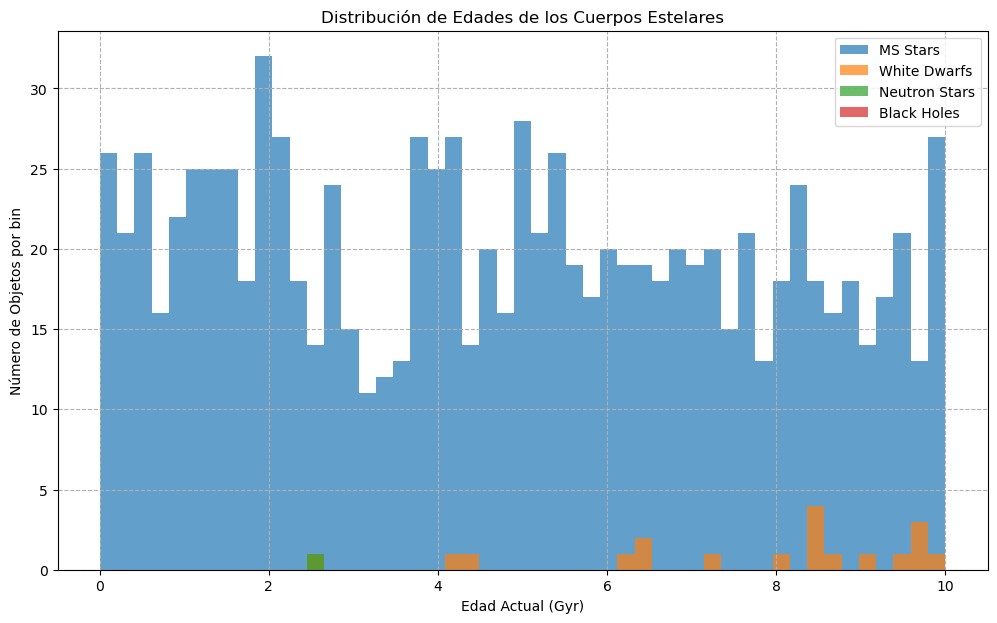

In [ ]:
print("\n--- Generando Gráficos para el Análisis ---")

# === Histograma de Edades ===
plt.figure(figsize=(12, 7))

# Filtramos las edades de cada tipo de objeto
edades_ms = edades_actuales[tipos_de_objetos == 'MS Star']
edades_wd = edades_actuales[tipos_de_objetos == 'White Dwarf']
edades_ns = edades_actuales[tipos_de_objetos == 'Neutron Star']
edades_bh = edades_actuales[tipos_de_objetos == 'Black Hole']


bins_edad = np.linspace(0, 10, 50)

# Graficamos histogramas con transparencia para poder compararlos
plt.hist(edades_ms, bins=bins_edad, alpha=0.7, label='MS Stars')
plt.hist(edades_wd, bins=bins_edad, alpha=0.7, label='White Dwarfs')
plt.hist(edades_ns, bins=bins_edad, alpha=0.7, label='Neutron Stars')
plt.hist(edades_bh, bins=bins_edad, alpha=0.7, label='Black Holes')


plt.title(f'Distribución de Edades de los Cuerpos Estelares')
plt.xlabel('Edad Actual (Gyr)')
plt.ylabel('Número de Objetos por bin')
plt.legend()
plt.grid(True, ls="--")
plt.show()

normalizado

Generating 1000 stellar masses (Salpeter IMF)...
Mass generation complete!

Classifying stellar objects...
Classification complete.

--- FRACTION OF OBJECT TYPES IN THE SIMULATED GALAXY ---

Generating final mass distribution histogram...


/usr/lib/python3/dist-packages/numpy/lib/histograms.py:885: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


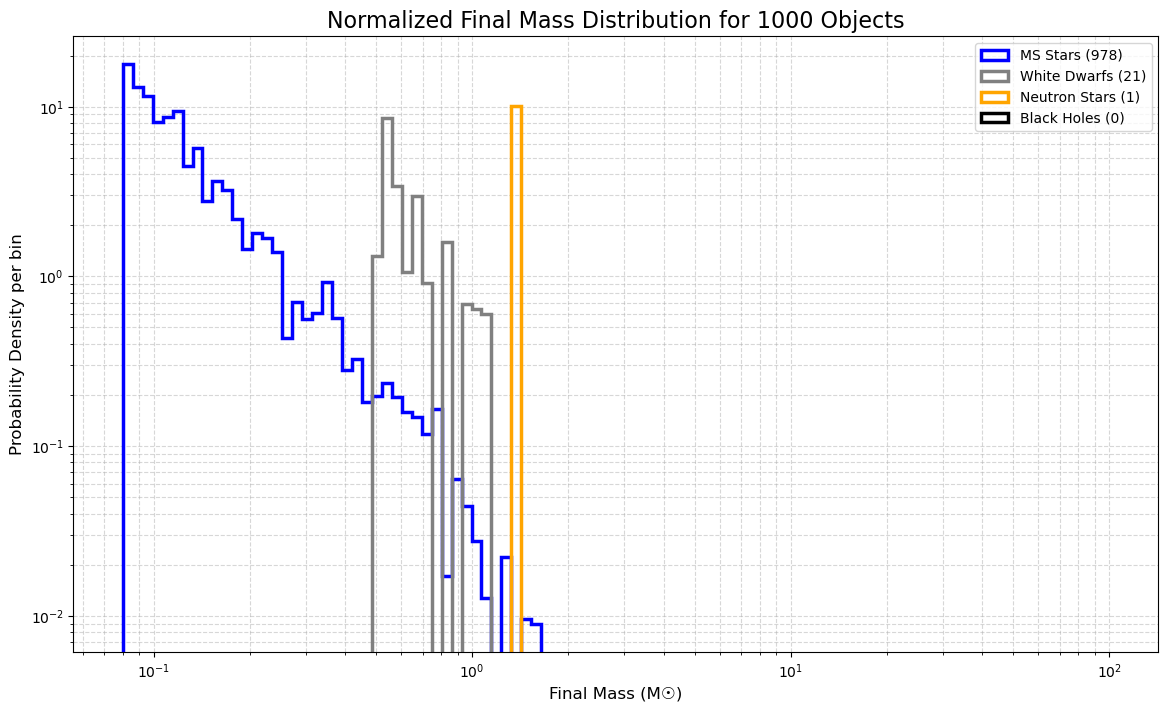


Generating age distribution histogram...


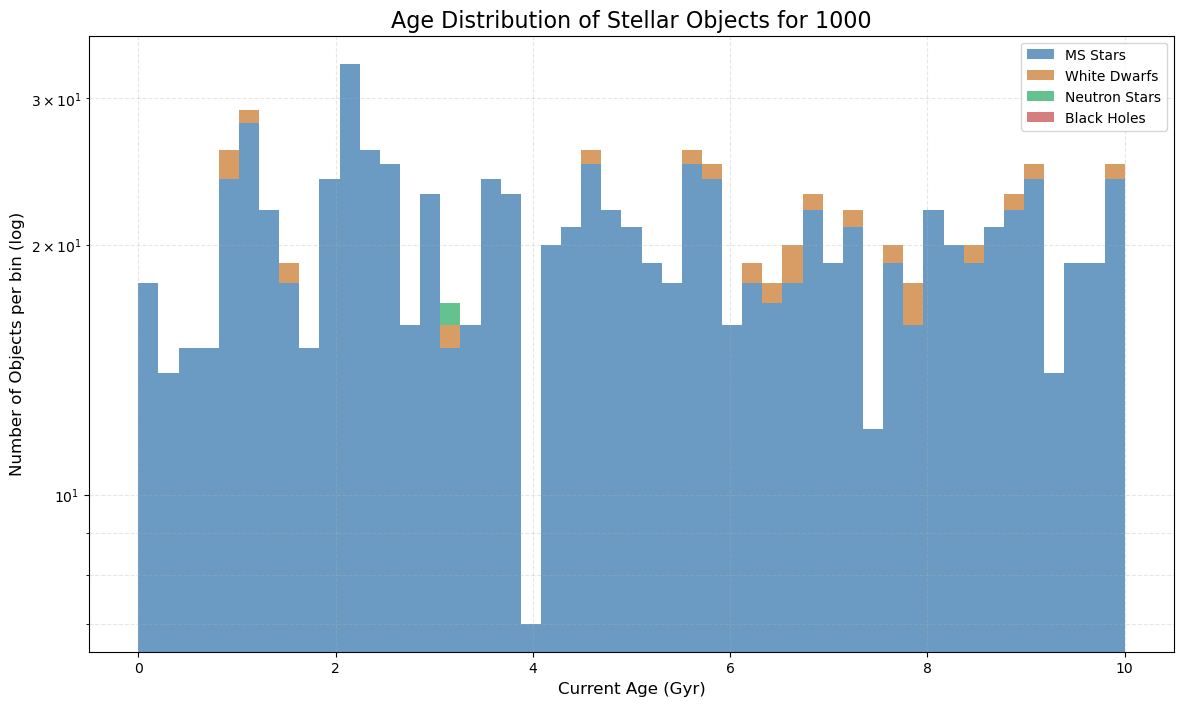


--- Masses of Oldest and Youngest Objects ---

--- MS Star ---
  Mass of the oldest: 0.09 M☉ (Age: 9.99 Gyr)
  Mass of the youngest: 0.08 M☉ (Age: 0.01 Gyr)

--- White Dwarf ---
  Mass of the oldest: 0.57 M☉ (Age: 9.98 Gyr)
  Mass of the youngest: 0.72 M☉ (Age: 0.98 Gyr)

--- Neutron Star ---
  Mass of the oldest: 1.36 M☉ (Age: 3.07 Gyr)
  Mass of the youngest: 1.36 M☉ (Age: 3.07 Gyr)


In [ ]:
def generate_salpeter_masses(n_stars):
    """
    Generates a list of stellar masses following the Salpeter IMF (1955)
    in the range 0.08 to 100 solar masses.
    """
    m_min = 0.08
    m_max = 100.0
    alpha = 2.35
    generated_masses = []
    p_max = m_min**(-alpha)

    print(f"Generating {n_stars} stellar masses (Salpeter IMF)...")
    
    while len(generated_masses) < n_stars:
        n_missing = n_stars - len(generated_masses)
        n_candidates = int(n_missing * 1.5)
        
        candidate_masses = np.random.uniform(m_min, m_max, n_candidates)
        candidate_probs = candidate_masses**(-alpha)
        dice = np.random.uniform(0, p_max, n_candidates)
        
        accepted_masses = candidate_masses[dice < candidate_probs]
        generated_masses.extend(accepted_masses)

    print("Mass generation complete!")
    return np.array(generated_masses[:n_stars])


N_STARS = 1000

# Global parameters
galaxy_age = 10.0  # Gyr

# === Simulation Steps ===
initial_masses = generate_salpeter_masses(N_STARS)
birth_times = np.random.uniform(0.0, galaxy_age, N_STARS)
current_ages = galaxy_age - birth_times

ms_lifetimes = 10.0 / (initial_masses**2.5)
is_ms = current_ages <= ms_lifetimes
is_remnant = ~is_ms

print("\nClassifying stellar objects...")
final_masses = np.zeros(N_STARS)
object_types = np.full(N_STARS, "", dtype='<U12')

final_masses[is_ms] = initial_masses[is_ms]
object_types[is_ms] = 'MS Star'

mask_wd = is_remnant & (initial_masses < 8)
mask_ns = is_remnant & (initial_masses >= 8) & (initial_masses < 20)
mask_bh = is_remnant & (initial_masses >= 20)

final_masses[mask_wd] = 0.109 * initial_masses[mask_wd] + 0.394
object_types[mask_wd] = 'White Dwarf'

m_ns_1 = mask_ns & (initial_masses < 14.75)
m_ini_1 = initial_masses[m_ns_1]
final_masses[m_ns_1] = 2.24 + 0.508*(m_ini_1 - 14.75) + 0.125*(m_ini_1 - 14.75)**2 + 0.011*(m_ini_1 - 14.75)**3

m_ns_2 = mask_ns & (initial_masses >= 14.75)
m_ini_2 = initial_masses[m_ns_2]
final_masses[m_ns_2] = 0.123 + 0.112 * m_ini_2

object_types[mask_ns] = 'Neutron Star'

fej = 0.9
m_ini_bh = initial_masses[mask_bh]
m_bh_core = -2.049 + 0.4140 * m_ini_bh
m_bh_all = (
    15.52 
    - 0.3294*(m_ini_bh - 25.97)
    - 0.02121*(m_ini_bh - 25.97)**2
    + 0.003120*(m_ini_bh - 25.97)**3
)
final_masses[mask_bh] = fej * m_bh_core + (1 - fej) * m_bh_all
object_types[mask_bh] = 'Black Hole'

print("Classification complete.")

print("\n--- FRACTION OF OBJECT TYPES IN THE SIMULATED GALAXY ---")


print("\nGenerating final mass distribution histogram...")
plt.style.use('default')
plt.figure(figsize=(14, 8))

masses_ms = final_masses[object_types == 'MS Star']
masses_wd = final_masses[object_types == 'White Dwarf']
masses_ns = final_masses[object_types == 'Neutron Star']
masses_bh = final_masses[object_types == 'Black Hole']

mass_bins = np.logspace(np.log10(0.08), np.log10(100), 100)

plt.hist(masses_ms, bins=mass_bins, histtype='step', density=True, linewidth=2.5, label=f'MS Stars ({len(masses_ms)})', color='blue')
plt.hist(masses_wd, bins=mass_bins, histtype='step', density=True, linewidth=2.5, label=f'White Dwarfs ({len(masses_wd)})', color='gray')
plt.hist(masses_ns, bins=mass_bins, histtype='step', density=True, linewidth=2.5, label=f'Neutron Stars ({len(masses_ns)})', color='orange')
plt.hist(masses_bh, bins=mass_bins, histtype='step', density=True, linewidth=2.5, label=f'Black Holes ({len(masses_bh)})', color='black')

plt.xscale('log')
plt.yscale('log')
plt.title(f'Normalized Final Mass Distribution for {N_STARS} Objects', fontsize=16)
plt.xlabel('Final Mass (M☉)', fontsize=12)
plt.ylabel('Probability Density per bin', fontsize=12)
plt.legend()
plt.grid(True, which="both", ls="--", alpha=0.5)
plt.show()

print("\nGenerating age distribution histogram...")
plt.figure(figsize=(14, 8))

ages_ms = current_ages[object_types == 'MS Star']
ages_wd = current_ages[object_types == 'White Dwarf']
ages_ns = current_ages[object_types == 'Neutron Star']
ages_bh = current_ages[object_types == 'Black Hole']

age_bins = np.linspace(0, 10, 50)

colors = ['steelblue', 'peru', 'mediumseagreen', 'indianred']
labels = ['MS Stars', 'White Dwarfs', 'Neutron Stars', 'Black Holes']

plt.hist(
    [ages_ms, ages_wd, ages_ns, ages_bh],
    bins=age_bins,
    stacked=True,
    label=labels,
    color=colors,
    alpha=0.8
)

plt.yscale('log')
plt.title(f'Age Distribution of Stellar Objects for {N_STARS}', fontsize=16)
plt.xlabel('Current Age (Gyr)', fontsize=12)
plt.ylabel('Number of Objects per bin (log)', fontsize=12)
plt.legend()
plt.grid(True, which="both", ls="--", alpha=0.3)
plt.show()


print("\n--- Masses of Oldest and Youngest Objects ---")
for obj in ['MS Star', 'White Dwarf', 'Neutron Star', 'Black Hole']:
    mask = object_types == obj
    if np.any(mask):
        ages_of_type = current_ages[mask]
        masses_of_type = final_masses[mask]
        
        idx_oldest = np.argmax(ages_of_type)
        idx_youngest = np.argmin(ages_of_type)
        
        mass_oldest = masses_of_type[idx_oldest]
        mass_youngest = masses_of_type[idx_youngest]
        
        age_oldest = np.max(ages_of_type)
        age_youngest = np.min(ages_of_type)
        
        print(f"\n--- {obj} ---")
        print(f"  Mass of the oldest: {mass_oldest:.2f} M☉ (Age: {age_oldest:.2f} Gyr)")
        print(f"  Mass of the youngest: {mass_youngest:.2f} M☉ (Age: {age_youngest:.2f} Gyr)")


### Para 100 Estrellas:

Generando 100 masas estelares (Salpeter IMF)...
¡Generación de masas completada!

Iniciando Paso 4: Clasificación de remanentes...
Clasificación completada.

--- Composición de la Galaxia Simulada ---
Estrellas de Secuencia Principal: 98 (98.00%)
Enanas Blancas: 2 (2.00%)
Estrellas de Neutrones: 0 (0.00%)
Agujeros Negros: 0 (0.00%)

Generando el histograma de distribución de masas finales...


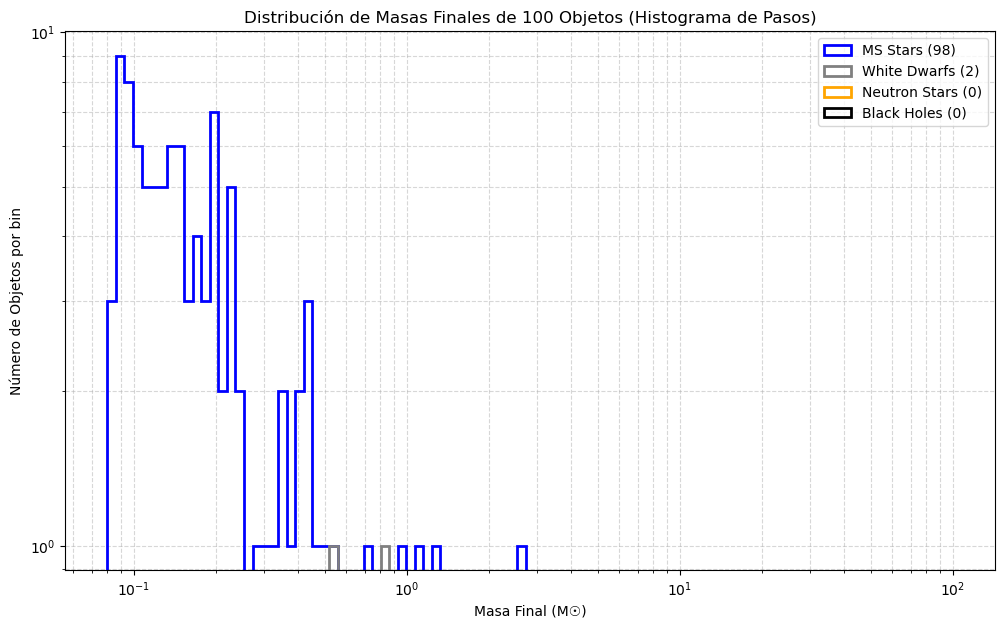

In [ ]:
def generar_masas_salpeter(numero_de_estrellas):
    """Genera masas estelares siguiendo la IMF de Salpeter."""
    masa_min = 0.08
    masa_max = 100.0
    alfa = 2.35
    masas_generadas = []
    prob_max = masa_min**(-alfa)

    print(f"Generando {numero_de_estrellas} masas estelares (Salpeter IMF)...")
    
    while len(masas_generadas) < numero_de_estrellas:
        n_necesarias = numero_de_estrellas - len(masas_generadas)
        n_candidatas = int(n_necesarias * 1.5)
        
        masas_candidatas = np.random.uniform(masa_min, masa_max, n_candidatas)
        prob_masas = masas_candidatas**(-alfa)
        dados_virtuales = np.random.uniform(0, prob_max, n_candidatas)
        
        masas_aceptadas = masas_candidatas[dados_virtuales < prob_masas]
        masas_generadas.extend(masas_aceptadas)

    print("¡Generación de masas completada!")
    return np.array(masas_generadas[:numero_de_estrellas])


N_ESTRELLAS = 100 
edad_galaxia = 10.0  # en Gyr


masas_iniciales = generar_masas_salpeter(N_ESTRELLAS)
tiempos_de_nacimiento = np.random.uniform(0.0, edad_galaxia, N_ESTRELLAS)
edades_actuales = edad_galaxia - tiempos_de_nacimiento
tiempos_de_vida_ms = 10.0 / (masas_iniciales**2.5)
es_ms = edades_actuales <= tiempos_de_vida_ms
es_remanente = ~es_ms


print("\nIniciando Paso 4: Clasificación de remanentes...")


masas_finales = np.zeros(N_ESTRELLAS)
tipos_de_objetos = np.full(N_ESTRELLAS, "", dtype='<U12') # U12 es un string de hasta 12 caracteres

masas_finales[es_ms] = masas_iniciales[es_ms]
tipos_de_objetos[es_ms] = 'MS Star'

mascara_wd = es_remanente & (masas_iniciales < 8)
mascara_ns = es_remanente & (masas_iniciales >= 8) & (masas_iniciales < 20)
mascara_bh = es_remanente & (masas_iniciales >= 20)


masas_finales[mascara_wd] = 0.109 * masas_iniciales[mascara_wd] + 0.394
tipos_de_objetos[mascara_wd] = 'White Dwarf'


m_ns_1 = mascara_ns & (masas_iniciales < 14.75) 
m_ini_1 = masas_iniciales[m_ns_1]
masas_finales[m_ns_1] = 2.24 + 0.508*(m_ini_1 - 14.75) + 0.125*(m_ini_1 - 14.75)**2 + 0.011*(m_ini_1 - 14.75)**3


m_ns_2 = mascara_ns & (masas_iniciales >= 14.75)
m_ini_2 = masas_iniciales[m_ns_2]
masas_finales[m_ns_2] = 0.123 + 0.112 * m_ini_2
tipos_de_objetos[mascara_ns] = 'Neutron Star'


# >> Para AGUJEROS NEGROS (BH) - Fórmulas de Raithel et al. (2018) con fej=0.9
fej = 0.9
m_ini_bh = masas_iniciales[mascara_bh]
# M_BH,core (Eq. 1 del paper)
m_bh_core = -2.049 + 0.4140 * m_ini_bh
# M_BH,all (Eq. 2 del paper)
m_bh_all = 15.52 - 0.3294*(m_ini_bh - 25.97) - 0.02121*(m_ini_bh - 25.97)**2 + 0.003120*(m_ini_bh - 25.97)**3
# Fórmula combinada (Eq. 4 del paper)
masas_finales[mascara_bh] = fej * m_bh_core + (1 - fej) * m_bh_all
tipos_de_objetos[mascara_bh] = 'Black Hole'

print("Clasificación completada.")


num_ms = np.sum(tipos_de_objetos == 'MS Star')
num_wd = np.sum(tipos_de_objetos == 'White Dwarf')
num_ns = np.sum(tipos_de_objetos == 'Neutron Star')
num_bh = np.sum(tipos_de_objetos == 'Black Hole')

print("\n--- Composición de la Galaxia Simulada ---")
print(f"Estrellas de Secuencia Principal: {num_ms} ({num_ms/N_ESTRELLAS:.2%})")
print(f"Enanas Blancas: {num_wd} ({num_wd/N_ESTRELLAS:.2%})")
print(f"Estrellas de Neutrones: {num_ns} ({num_ns/N_ESTRELLAS:.2%})")
print(f"Agujeros Negros: {num_bh} ({num_bh/N_ESTRELLAS:.2%})")


print("\nGenerando el histograma de distribución de masas finales...")
plt.figure(figsize=(12, 7))


masas_ms = masas_finales[tipos_de_objetos == 'MS Star']
masas_wd = masas_finales[tipos_de_objetos == 'White Dwarf']
masas_ns = masas_finales[tipos_de_objetos == 'Neutron Star']
masas_bh = masas_finales[tipos_de_objetos == 'Black Hole']


bins = np.logspace(np.log10(0.08), np.log10(100), 100)


plt.hist(masas_ms, bins=bins, histtype='step', linewidth=2, label=f'MS Stars ({len(masas_ms)})', color='blue')
plt.hist(masas_wd, bins=bins, histtype='step', linewidth=2, label=f'White Dwarfs ({len(masas_wd)})', color='grey')
plt.hist(masas_ns, bins=bins, histtype='step', linewidth=2, label=f'Neutron Stars ({len(masas_ns)})', color='orange')
plt.hist(masas_bh, bins=bins, histtype='step', linewidth=2, label=f'Black Holes ({len(masas_bh)})', color='black')


plt.xscale('log')
plt.yscale('log') 

plt.title(f'Distribución de Masas Finales de {N_ESTRELLAS} Objetos (Histograma de Pasos)')
plt.xlabel('Masa Final (M☉)')
plt.ylabel('Número de Objetos por bin')
plt.legend()
plt.grid(True, which="both", ls="--", alpha=0.5) # La grilla ayuda a leer las escalas log
plt.show()


--- Generando Gráficos para el Análisis ---


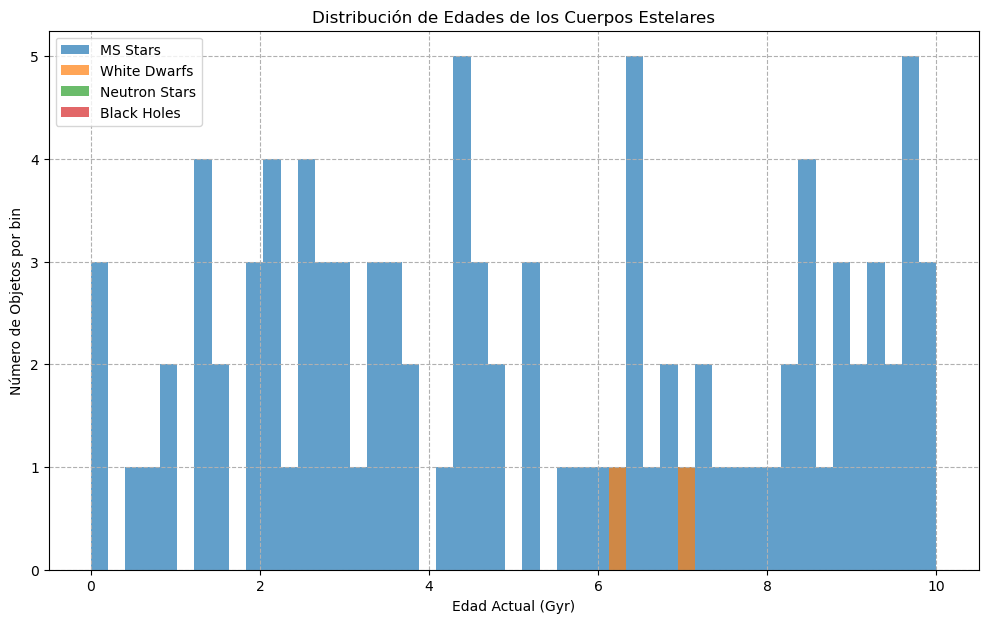

In [ ]:
print("\n--- Generando Gráficos para el Análisis ---")


plt.figure(figsize=(12, 7))


edades_ms = edades_actuales[tipos_de_objetos == 'MS Star']
edades_wd = edades_actuales[tipos_de_objetos == 'White Dwarf']
edades_ns = edades_actuales[tipos_de_objetos == 'Neutron Star']
edades_bh = edades_actuales[tipos_de_objetos == 'Black Hole']


bins_edad = np.linspace(0, 10, 50)


plt.hist(edades_ms, bins=bins_edad, alpha=0.7, label='MS Stars')
plt.hist(edades_wd, bins=bins_edad, alpha=0.7, label='White Dwarfs')
plt.hist(edades_ns, bins=bins_edad, alpha=0.7, label='Neutron Stars')
plt.hist(edades_bh, bins=bins_edad, alpha=0.7, label='Black Holes')


plt.title(f'Distribución de Edades de los Cuerpos Estelares')
plt.xlabel('Edad Actual (Gyr)')
plt.ylabel('Número de Objetos por bin')
plt.legend()
plt.grid(True, ls="--")
plt.show()

normalizado

Generating 100 stellar masses (Salpeter IMF)...
Mass generation complete!

Classifying stellar objects...
Classification complete.

--- FRACTION OF OBJECT TYPES IN THE SIMULATED GALAXY ---

Generating final mass distribution histogram...


/usr/lib/python3/dist-packages/numpy/lib/histograms.py:885: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


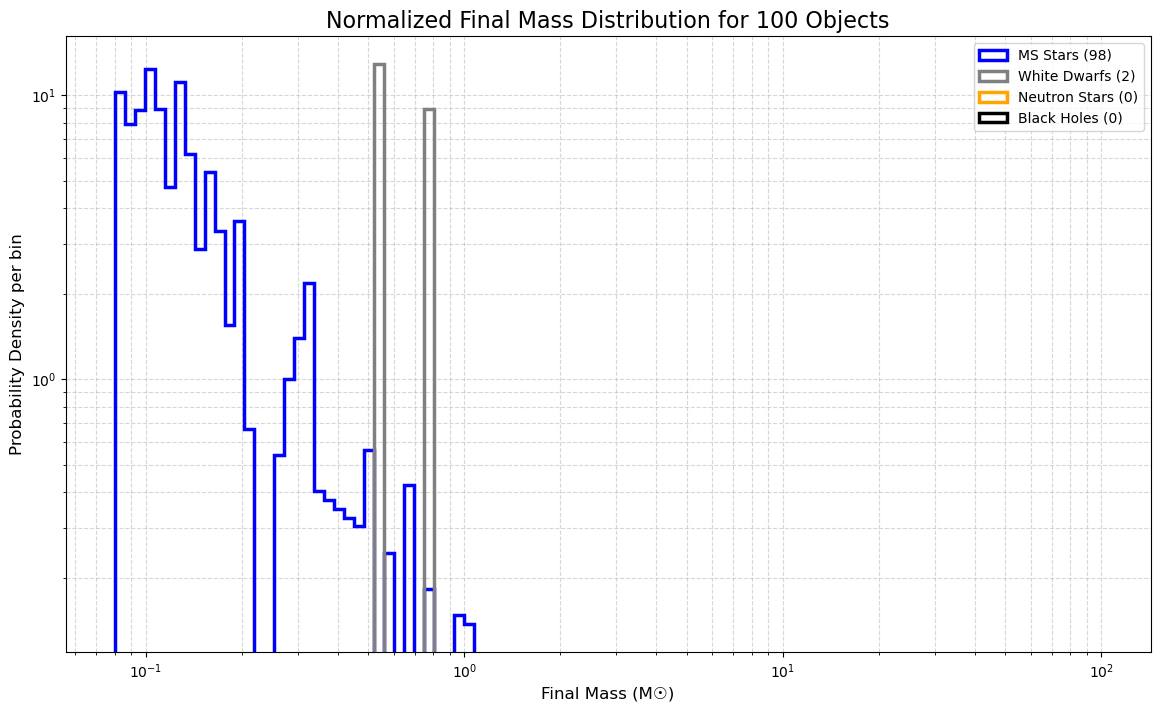


Generating age distribution histogram...


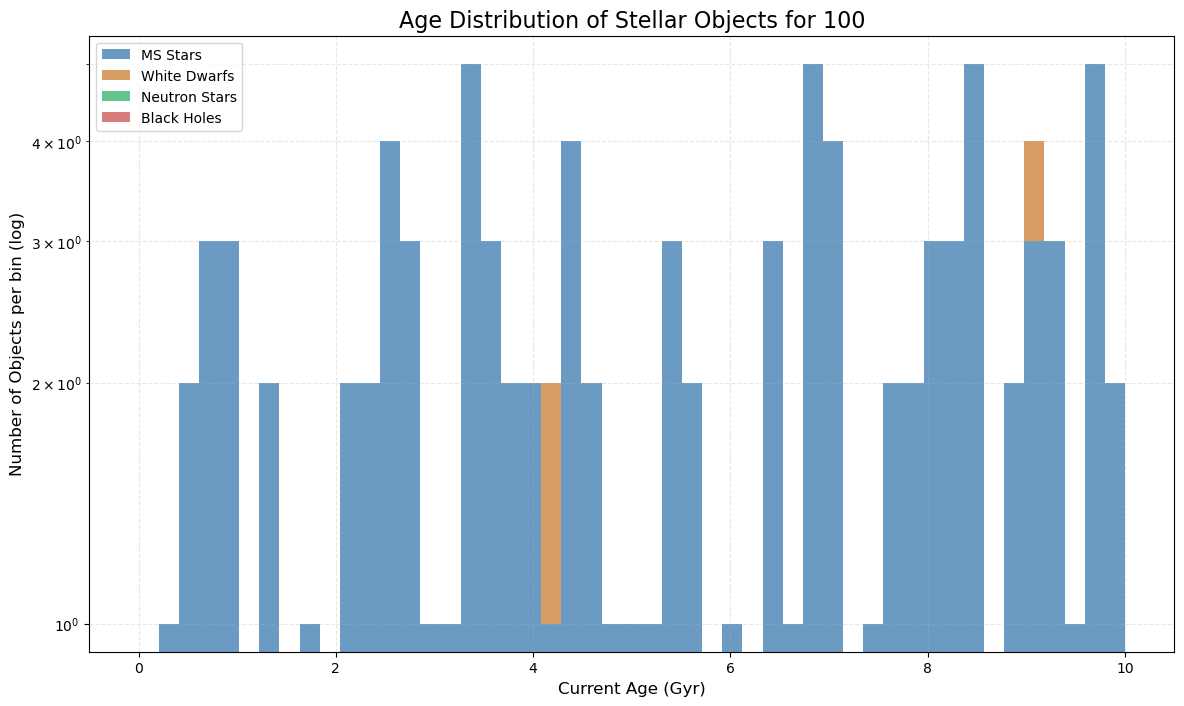


--- Masses of Oldest and Youngest Objects ---

--- MS Star ---
  Mass of the oldest: 0.48 M☉ (Age: 9.92 Gyr)
  Mass of the youngest: 0.16 M☉ (Age: 0.31 Gyr)

--- White Dwarf ---
  Mass of the oldest: 0.52 M☉ (Age: 9.17 Gyr)
  Mass of the youngest: 0.76 M☉ (Age: 4.10 Gyr)


In [ ]:
def generate_salpeter_masses(n_stars):
    """
    Generates a list of stellar masses following the Salpeter IMF (1955)
    in the range 0.08 to 100 solar masses.
    """
    m_min = 0.08
    m_max = 100.0
    alpha = 2.35
    generated_masses = []
    p_max = m_min**(-alpha)

    print(f"Generating {n_stars} stellar masses (Salpeter IMF)...")
    
    while len(generated_masses) < n_stars:
        n_missing = n_stars - len(generated_masses)
        n_candidates = int(n_missing * 1.5)
        
        candidate_masses = np.random.uniform(m_min, m_max, n_candidates)
        candidate_probs = candidate_masses**(-alpha)
        dice = np.random.uniform(0, p_max, n_candidates)
        
        accepted_masses = candidate_masses[dice < candidate_probs]
        generated_masses.extend(accepted_masses)

    print("Mass generation complete!")
    return np.array(generated_masses[:n_stars])


N_STARS = 100

# Global parameters
galaxy_age = 10.0  # Gyr

# === Simulation Steps ===
initial_masses = generate_salpeter_masses(N_STARS)
birth_times = np.random.uniform(0.0, galaxy_age, N_STARS)
current_ages = galaxy_age - birth_times

ms_lifetimes = 10.0 / (initial_masses**2.5)
is_ms = current_ages <= ms_lifetimes
is_remnant = ~is_ms

print("\nClassifying stellar objects...")
final_masses = np.zeros(N_STARS)
object_types = np.full(N_STARS, "", dtype='<U12')

final_masses[is_ms] = initial_masses[is_ms]
object_types[is_ms] = 'MS Star'

mask_wd = is_remnant & (initial_masses < 8)
mask_ns = is_remnant & (initial_masses >= 8) & (initial_masses < 20)
mask_bh = is_remnant & (initial_masses >= 20)

final_masses[mask_wd] = 0.109 * initial_masses[mask_wd] + 0.394
object_types[mask_wd] = 'White Dwarf'

m_ns_1 = mask_ns & (initial_masses < 14.75)
m_ini_1 = initial_masses[m_ns_1]
final_masses[m_ns_1] = 2.24 + 0.508*(m_ini_1 - 14.75) + 0.125*(m_ini_1 - 14.75)**2 + 0.011*(m_ini_1 - 14.75)**3

m_ns_2 = mask_ns & (initial_masses >= 14.75)
m_ini_2 = initial_masses[m_ns_2]
final_masses[m_ns_2] = 0.123 + 0.112 * m_ini_2

object_types[mask_ns] = 'Neutron Star'

fej = 0.9
m_ini_bh = initial_masses[mask_bh]
m_bh_core = -2.049 + 0.4140 * m_ini_bh
m_bh_all = (
    15.52 
    - 0.3294*(m_ini_bh - 25.97)
    - 0.02121*(m_ini_bh - 25.97)**2
    + 0.003120*(m_ini_bh - 25.97)**3
)
final_masses[mask_bh] = fej * m_bh_core + (1 - fej) * m_bh_all
object_types[mask_bh] = 'Black Hole'

print("Classification complete.")


print("\n--- FRACTION OF OBJECT TYPES IN THE SIMULATED GALAXY ---")

print("\nGenerating final mass distribution histogram...")
plt.style.use('default')
plt.figure(figsize=(14, 8))

masses_ms = final_masses[object_types == 'MS Star']
masses_wd = final_masses[object_types == 'White Dwarf']
masses_ns = final_masses[object_types == 'Neutron Star']
masses_bh = final_masses[object_types == 'Black Hole']

mass_bins = np.logspace(np.log10(0.08), np.log10(100), 100)

plt.hist(masses_ms, bins=mass_bins, histtype='step', density=True, linewidth=2.5, label=f'MS Stars ({len(masses_ms)})', color='blue')
plt.hist(masses_wd, bins=mass_bins, histtype='step', density=True, linewidth=2.5, label=f'White Dwarfs ({len(masses_wd)})', color='gray')
plt.hist(masses_ns, bins=mass_bins, histtype='step', density=True, linewidth=2.5, label=f'Neutron Stars ({len(masses_ns)})', color='orange')
plt.hist(masses_bh, bins=mass_bins, histtype='step', density=True, linewidth=2.5, label=f'Black Holes ({len(masses_bh)})', color='black')

plt.xscale('log')
plt.yscale('log')
plt.title(f'Normalized Final Mass Distribution for {N_STARS} Objects', fontsize=16)
plt.xlabel('Final Mass (M☉)', fontsize=12)
plt.ylabel('Probability Density per bin', fontsize=12)
plt.legend()
plt.grid(True, which="both", ls="--", alpha=0.5)
plt.show()


print("\nGenerating age distribution histogram...")
plt.figure(figsize=(14, 8))

ages_ms = current_ages[object_types == 'MS Star']
ages_wd = current_ages[object_types == 'White Dwarf']
ages_ns = current_ages[object_types == 'Neutron Star']
ages_bh = current_ages[object_types == 'Black Hole']

age_bins = np.linspace(0, 10, 50)

colors = ['steelblue', 'peru', 'mediumseagreen', 'indianred']
labels = ['MS Stars', 'White Dwarfs', 'Neutron Stars', 'Black Holes']

plt.hist(
    [ages_ms, ages_wd, ages_ns, ages_bh],
    bins=age_bins,
    stacked=True,
    label=labels,
    color=colors,
    alpha=0.8
)

plt.yscale('log')
plt.title(f'Age Distribution of Stellar Objects for {N_STARS}', fontsize=16)
plt.xlabel('Current Age (Gyr)', fontsize=12)
plt.ylabel('Number of Objects per bin (log)', fontsize=12)
plt.legend()
plt.grid(True, which="both", ls="--", alpha=0.3)
plt.show()


print("\n--- Masses of Oldest and Youngest Objects ---")
for obj in ['MS Star', 'White Dwarf', 'Neutron Star', 'Black Hole']:
    mask = object_types == obj
    if np.any(mask):
        ages_of_type = current_ages[mask]
        masses_of_type = final_masses[mask]
        
        idx_oldest = np.argmax(ages_of_type)
        idx_youngest = np.argmin(ages_of_type)
        
        mass_oldest = masses_of_type[idx_oldest]
        mass_youngest = masses_of_type[idx_youngest]
        
        age_oldest = np.max(ages_of_type)
        age_youngest = np.min(ages_of_type)
        
        print(f"\n--- {obj} ---")
        print(f"  Mass of the oldest: {mass_oldest:.2f} M☉ (Age: {age_oldest:.2f} Gyr)")
        print(f"  Mass of the youngest: {mass_youngest:.2f} M☉ (Age: {age_youngest:.2f} Gyr)")


## GRAFICAS MEZCLADAS


--- Generating Final Mass Distribution Plots ---

--- Running simulation for 100 stars ---
Simulation finished.

--- Running simulation for 1000 stars ---


/usr/lib/python3/dist-packages/numpy/lib/histograms.py:885: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


Simulation finished.

--- Running simulation for 10000 stars ---
Simulation finished.

--- Running simulation for 100000 stars ---
Simulation finished.

--- Running simulation for 1000000 stars ---
Simulation finished.


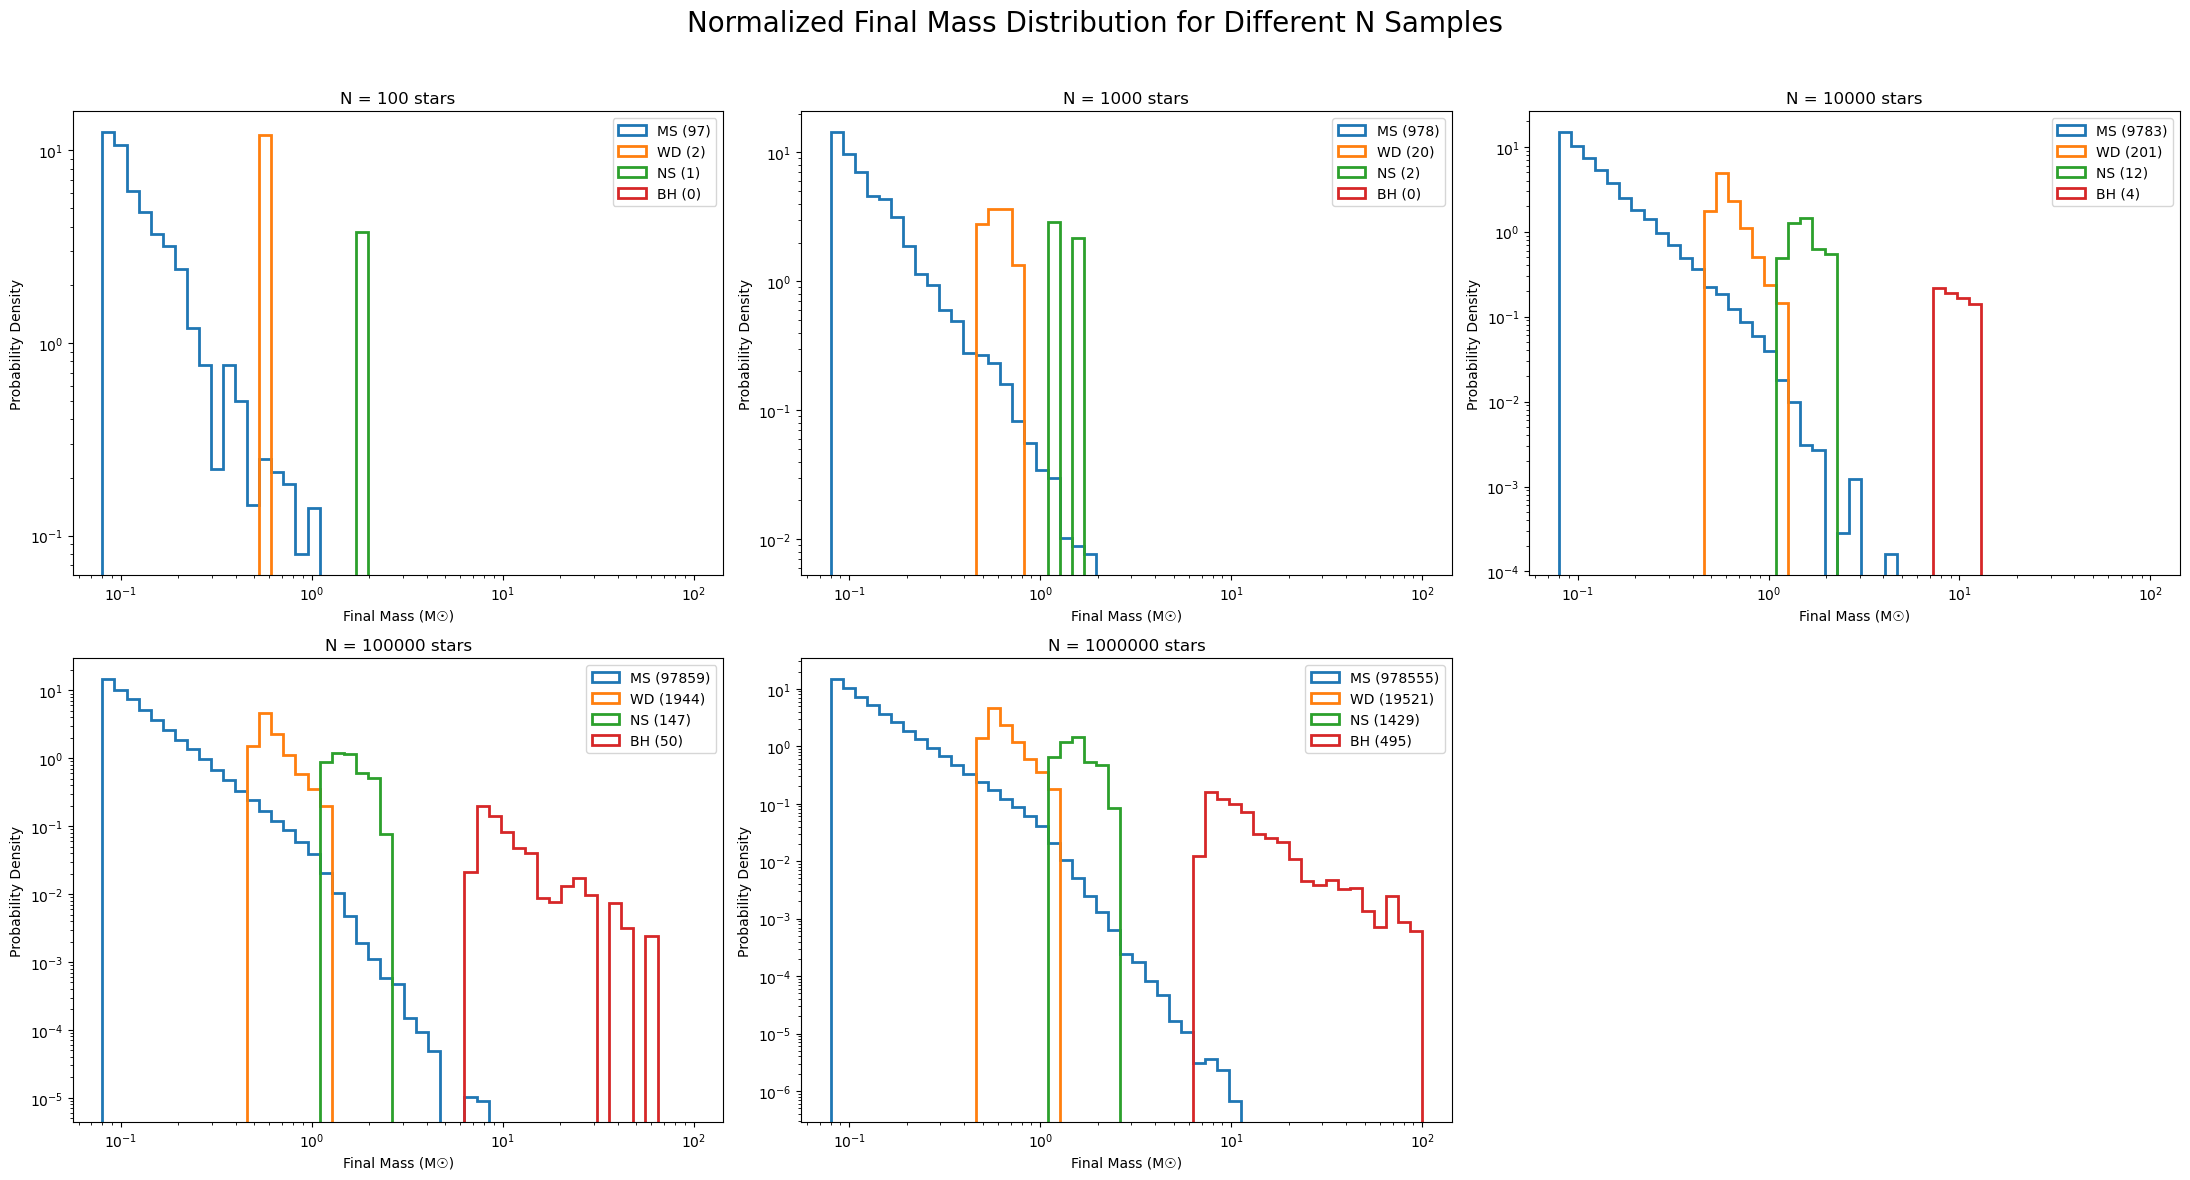


--- Generating Age Distribution Plots ---

--- Running simulation for 100 stars ---
Simulation finished.

--- Running simulation for 1000 stars ---
Simulation finished.

--- Running simulation for 10000 stars ---
Simulation finished.

--- Running simulation for 100000 stars ---
Simulation finished.

--- Running simulation for 1000000 stars ---
Simulation finished.


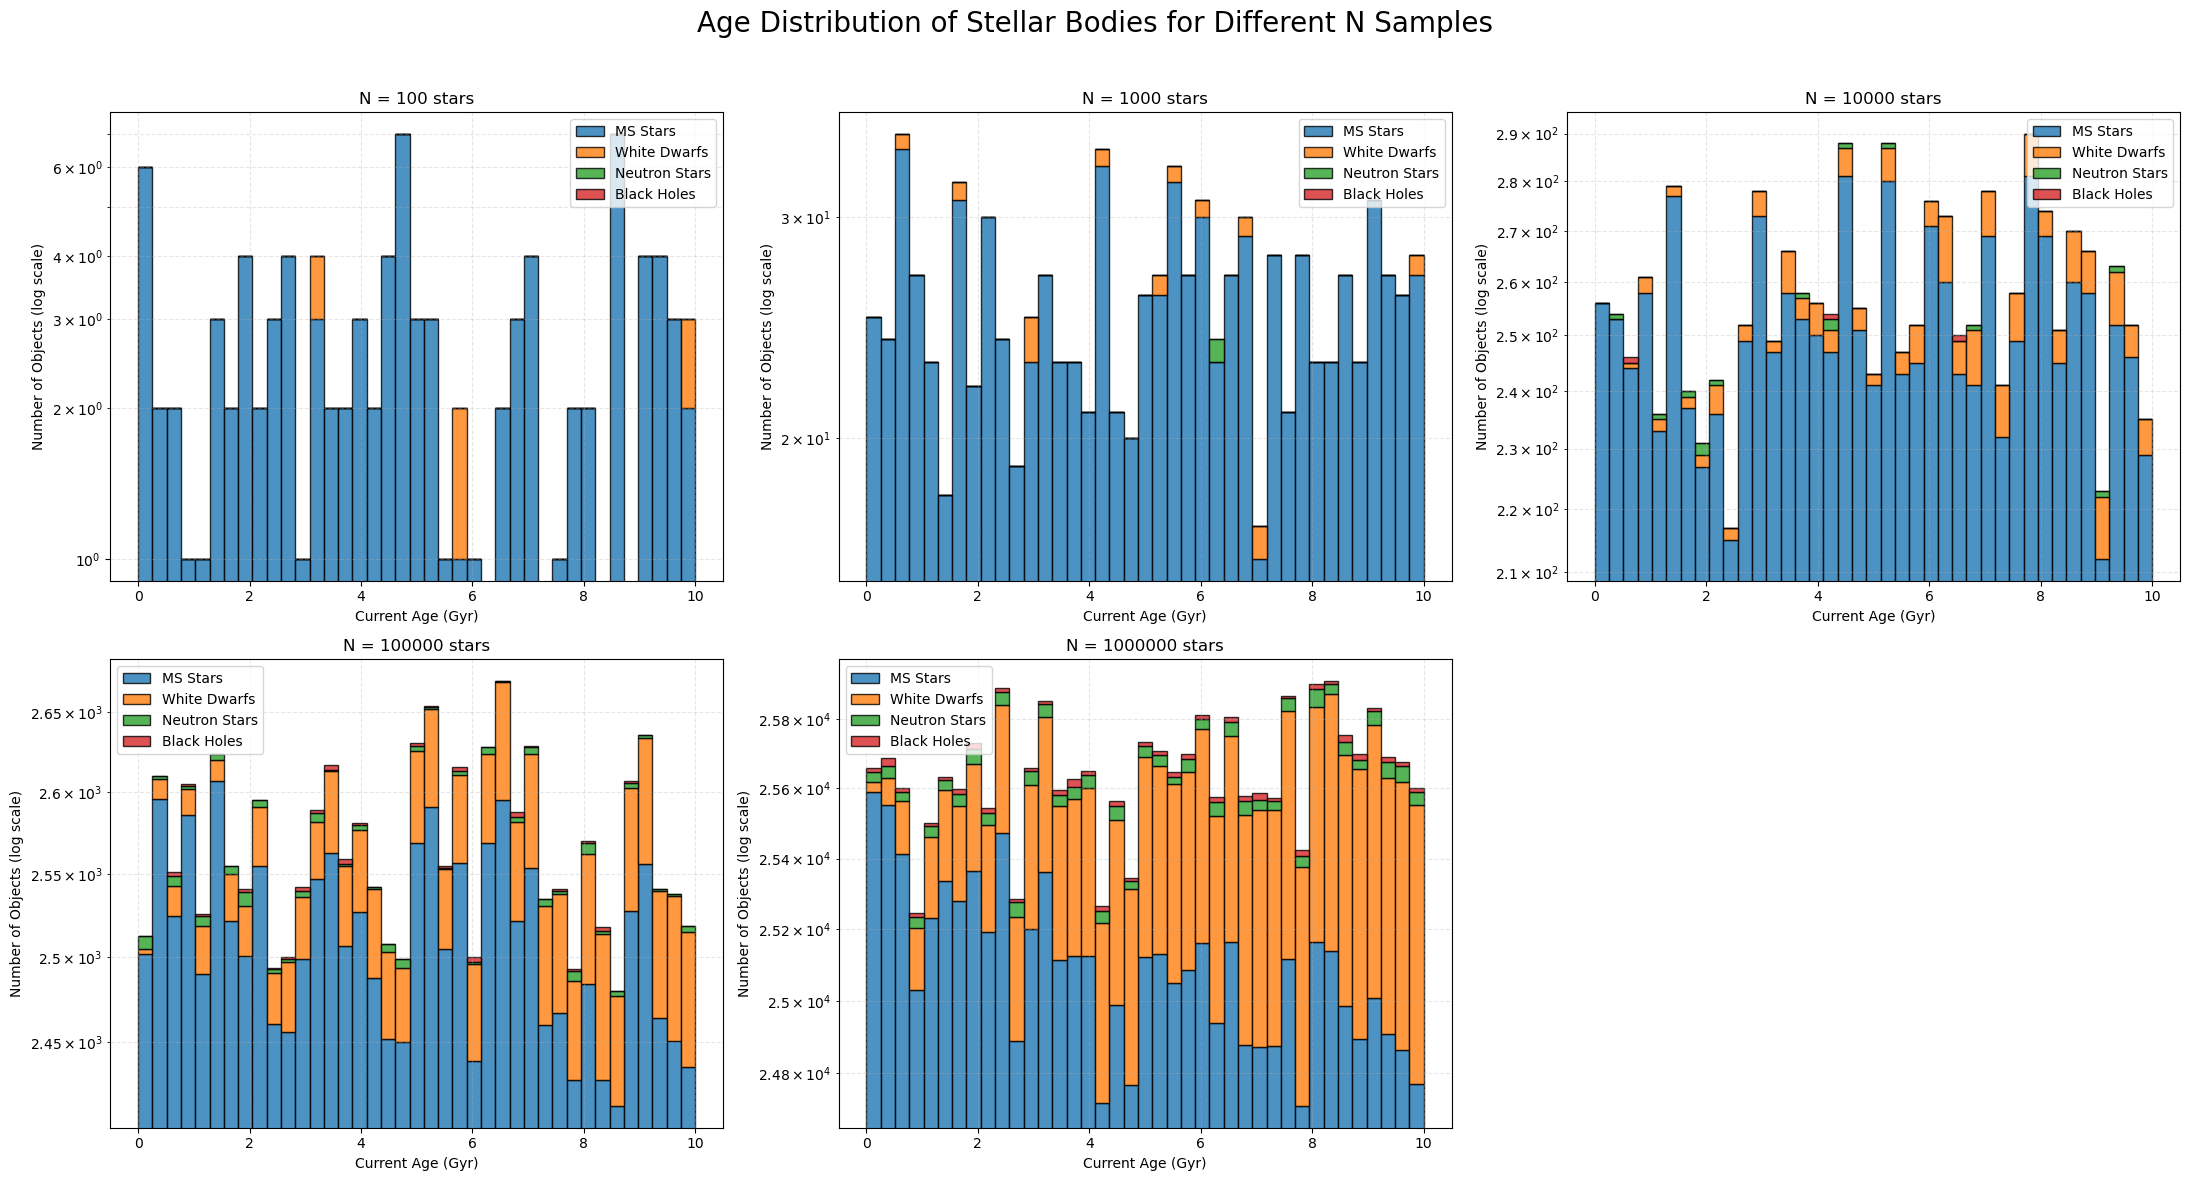

In [ ]:
def run_simulation(n_stars):
    """
    Runs the entire Monte Carlo simulation for a given number of stars.
    
    Includes:
    1. Mass generation (Salpeter IMF).
    2. Birth time assignment (Constant SFR).
    3. Stellar evolution check (MS vs. Remnant).
    4. Remnant classification and final mass calculation (IFMRs).

    Parameters:
    n_stars (int): The number of stars to simulate.

    Returns:
    tuple: (object_types, final_masses, current_ages) arrays with simulation results.
    """
    
    # --- Mass Generation (Salpeter IMF) ---
    def generate_salpeter_masses(number_of_stars):
        masa_min, masa_max, alfa = 0.08, 100.0, 2.35
        masas_generadas = []
        prob_max = masa_min**(-alfa)
        
        while len(masas_generadas) < number_of_stars:
            n_needed = number_of_stars - len(masas_generadas)
            n_candidates = int(n_needed * 2.0) # Generate more candidates to speed up
            
            candidate_masses = np.random.uniform(masa_min, masa_max, n_candidates)
            mass_probabilities = candidate_masses**(-alfa)
            random_triggers = np.random.uniform(0, prob_max, n_candidates)
            
            accepted_masses = candidate_masses[random_triggers < mass_probabilities]
            masas_generadas.extend(accepted_masses)
            
        return np.array(masas_generadas[:number_of_stars])

    print(f"\n--- Running simulation for {n_stars} stars ---")
    
    # === Simulation Steps ===
    galaxy_age = 10.0
    initial_masses = generate_salpeter_masses(n_stars)
    birth_times = np.random.uniform(0.0, galaxy_age, n_stars)
    current_ages = galaxy_age - birth_times
    ms_lifetimes = 10.0 / (initial_masses**2.5)
    
    is_ms = current_ages <= ms_lifetimes
    is_remnant = ~is_ms

    final_masses = np.zeros(n_stars)
    object_types = np.full(n_stars, "", dtype='<U12')
    
    final_masses[is_ms] = initial_masses[is_ms]
    object_types[is_ms] = 'MS Star'
    
    wd_mask = is_remnant & (initial_masses < 8)
    ns_mask = is_remnant & (initial_masses >= 8) & (initial_masses < 20)
    bh_mask = is_remnant & (initial_masses >= 20)
    
    final_masses[wd_mask] = 0.109 * initial_masses[wd_mask] + 0.394
    object_types[wd_mask] = 'White Dwarf'

    m_ns_1 = ns_mask & (initial_masses < 14.75)
    m_ini_1 = initial_masses[m_ns_1]
    final_masses[m_ns_1] = 2.24 + 0.508*(m_ini_1 - 14.75) + 0.125*(m_ini_1 - 14.75)**2 + 0.011*(m_ini_1 - 14.75)**3
    m_ns_2 = ns_mask & (initial_masses >= 14.75)
    m_ini_2 = initial_masses[m_ns_2]
    final_masses[m_ns_2] = 0.123 + 0.112 * m_ini_2
    object_types[ns_mask] = 'Neutron Star'

    fej = 0.9
    m_ini_bh = initial_masses[bh_mask]
    m_bh_core = -2.049 + 0.4140 * m_ini_bh
    m_bh_all = (15.52 - 0.3294*(m_ini_bh - 25.97) - 0.02121*(m_ini_bh - 25.97)**2 + 0.003120*(m_ini_bh - 25.97)**3)
    final_masses[bh_mask] = fej * m_bh_core + (1 - fej) * m_bh_all
    object_types[bh_mask] = 'Black Hole'

    print("Simulation finished.")
    return object_types, final_masses, current_ages


star_counts = [100, 1000, 10000, 100000, 1000000]


print("\n--- Generating Final Mass Distribution Plots ---")
fig_mass, axes_mass = plt.subplots(2, 3, figsize=(22, 12))
axes_mass = axes_mass.flatten() 

for i, n_stars in enumerate(star_counts):
    ax = axes_mass[i]
    object_types, final_masses, _ = run_simulation(n_stars)

    # Filtrar masas
    masses_ms = final_masses[object_types == 'MS Star']
    masses_wd = final_masses[object_types == 'White Dwarf']
    masses_ns = final_masses[object_types == 'Neutron Star']
    masses_bh = final_masses[object_types == 'Black Hole']
    
    mass_bins = np.logspace(np.log10(0.08), np.log10(100), 50)
    
    # Graficar histogramas normalizados
    ax.hist(masses_ms, bins=mass_bins, histtype='step', density=True, linewidth=2, label=f'MS ({len(masses_ms)})')
    ax.hist(masses_wd, bins=mass_bins, histtype='step', density=True, linewidth=2, label=f'WD ({len(masses_wd)})')
    ax.hist(masses_ns, bins=mass_bins, histtype='step', density=True, linewidth=2, label=f'NS ({len(masses_ns)})')
    ax.hist(masses_bh, bins=mass_bins, histtype='step', density=True, linewidth=2, label=f'BH ({len(masses_bh)})')
    
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_title(f'N = {n_stars} stars')
    ax.set_xlabel('Final Mass (M☉)')
    ax.set_ylabel('Probability Density')
    ax.legend()
    #ax.grid(True, which="both", ls="--", alpha=0.5)

fig_mass.delaxes(axes_mass[5]) 
fig_mass.suptitle('Normalized Final Mass Distribution for Different N Samples', fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

print("\n--- Generating Age Distribution Plots ---")
fig_age, axes_age = plt.subplots(2, 3, figsize=(22, 12))
axes_age = axes_age.flatten()

for i, n_stars in enumerate(star_counts):
    ax = axes_age[i]
    object_types, _, current_ages = run_simulation(n_stars)
    
    ages_ms = current_ages[object_types == 'MS Star']
    ages_wd = current_ages[object_types == 'White Dwarf']
    ages_ns = current_ages[object_types == 'Neutron Star']
    ages_bh = current_ages[object_types == 'Black Hole']
    
    age_bins = np.linspace(0, 10, 40)
    
    ax.hist([ages_ms, ages_wd, ages_ns, ages_bh],
            bins=age_bins,
            stacked=True,
            label=['MS Stars', 'White Dwarfs', 'Neutron Stars', 'Black Holes'],
            alpha=0.8,
            edgecolor='black')
    
    ax.set_yscale('log') 
    ax.set_title(f'N = {n_stars} stars')
    ax.set_xlabel('Current Age (Gyr)')
    ax.set_ylabel('Number of Objects (log scale)')
    ax.legend()
    ax.grid(True, which="both", ls="--", alpha=0.3)
    
fig_age.delaxes(axes_age[5])
fig_age.suptitle('Age Distribution of Stellar Bodies for Different N Samples', fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


--- Generating Final Mass Distribution Plots ---

--- Running simulation for 100 stars ---
Simulation finished.

--- Running simulation for 1000 stars ---


/usr/lib/python3/dist-packages/numpy/lib/histograms.py:885: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


Simulation finished.

--- Running simulation for 10000 stars ---
Simulation finished.

--- Running simulation for 100000 stars ---
Simulation finished.

--- Running simulation for 1000000 stars ---
Simulation finished.


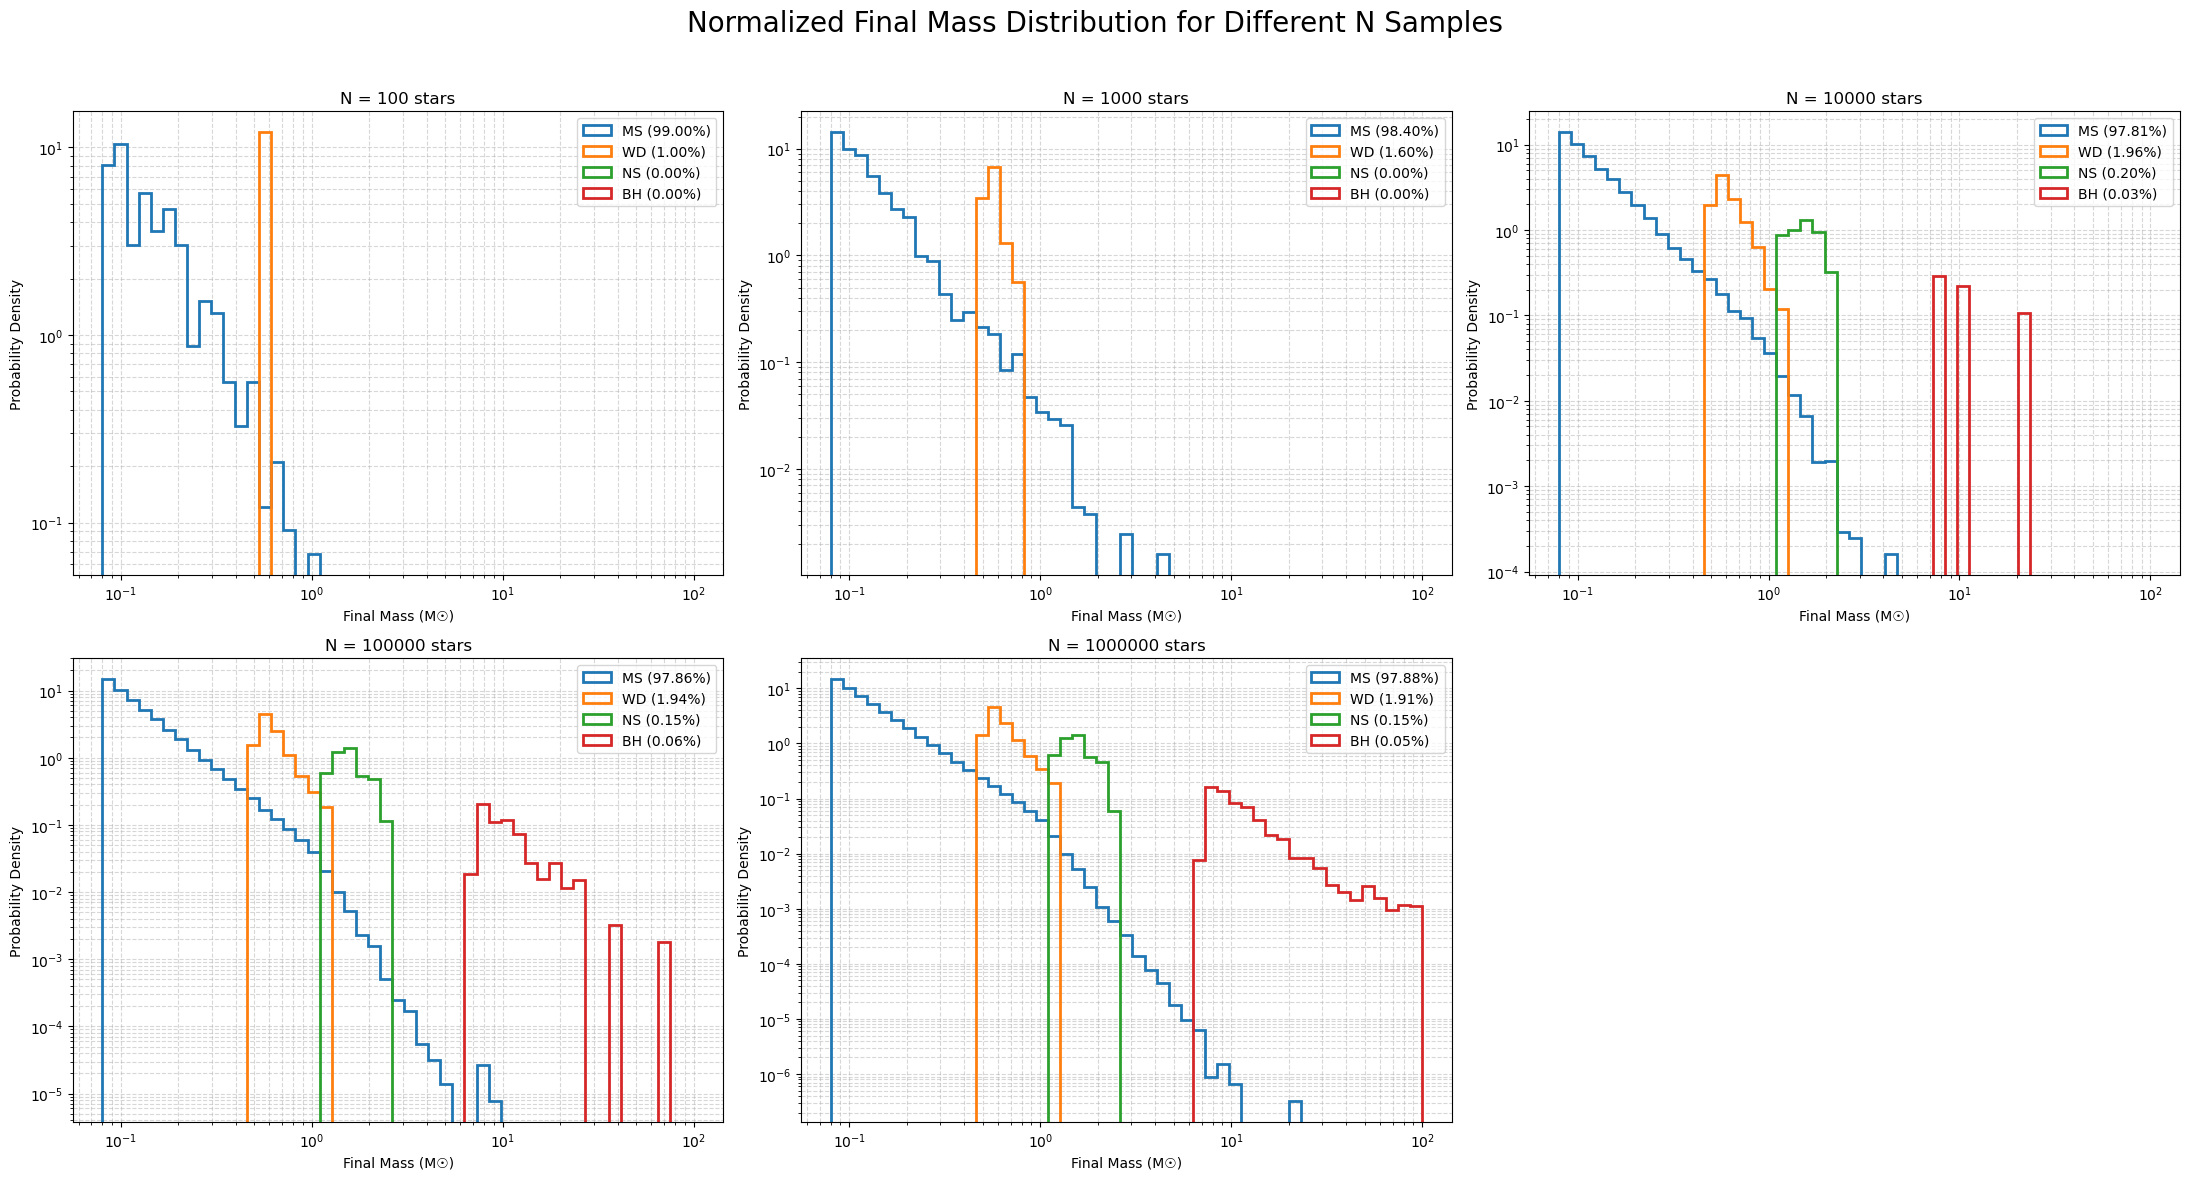


--- Generating Age Distribution Plots ---

--- Running simulation for 100 stars ---
Simulation finished.

--- Running simulation for 1000 stars ---
Simulation finished.

--- Running simulation for 10000 stars ---
Simulation finished.

--- Running simulation for 100000 stars ---
Simulation finished.

--- Running simulation for 1000000 stars ---
Simulation finished.


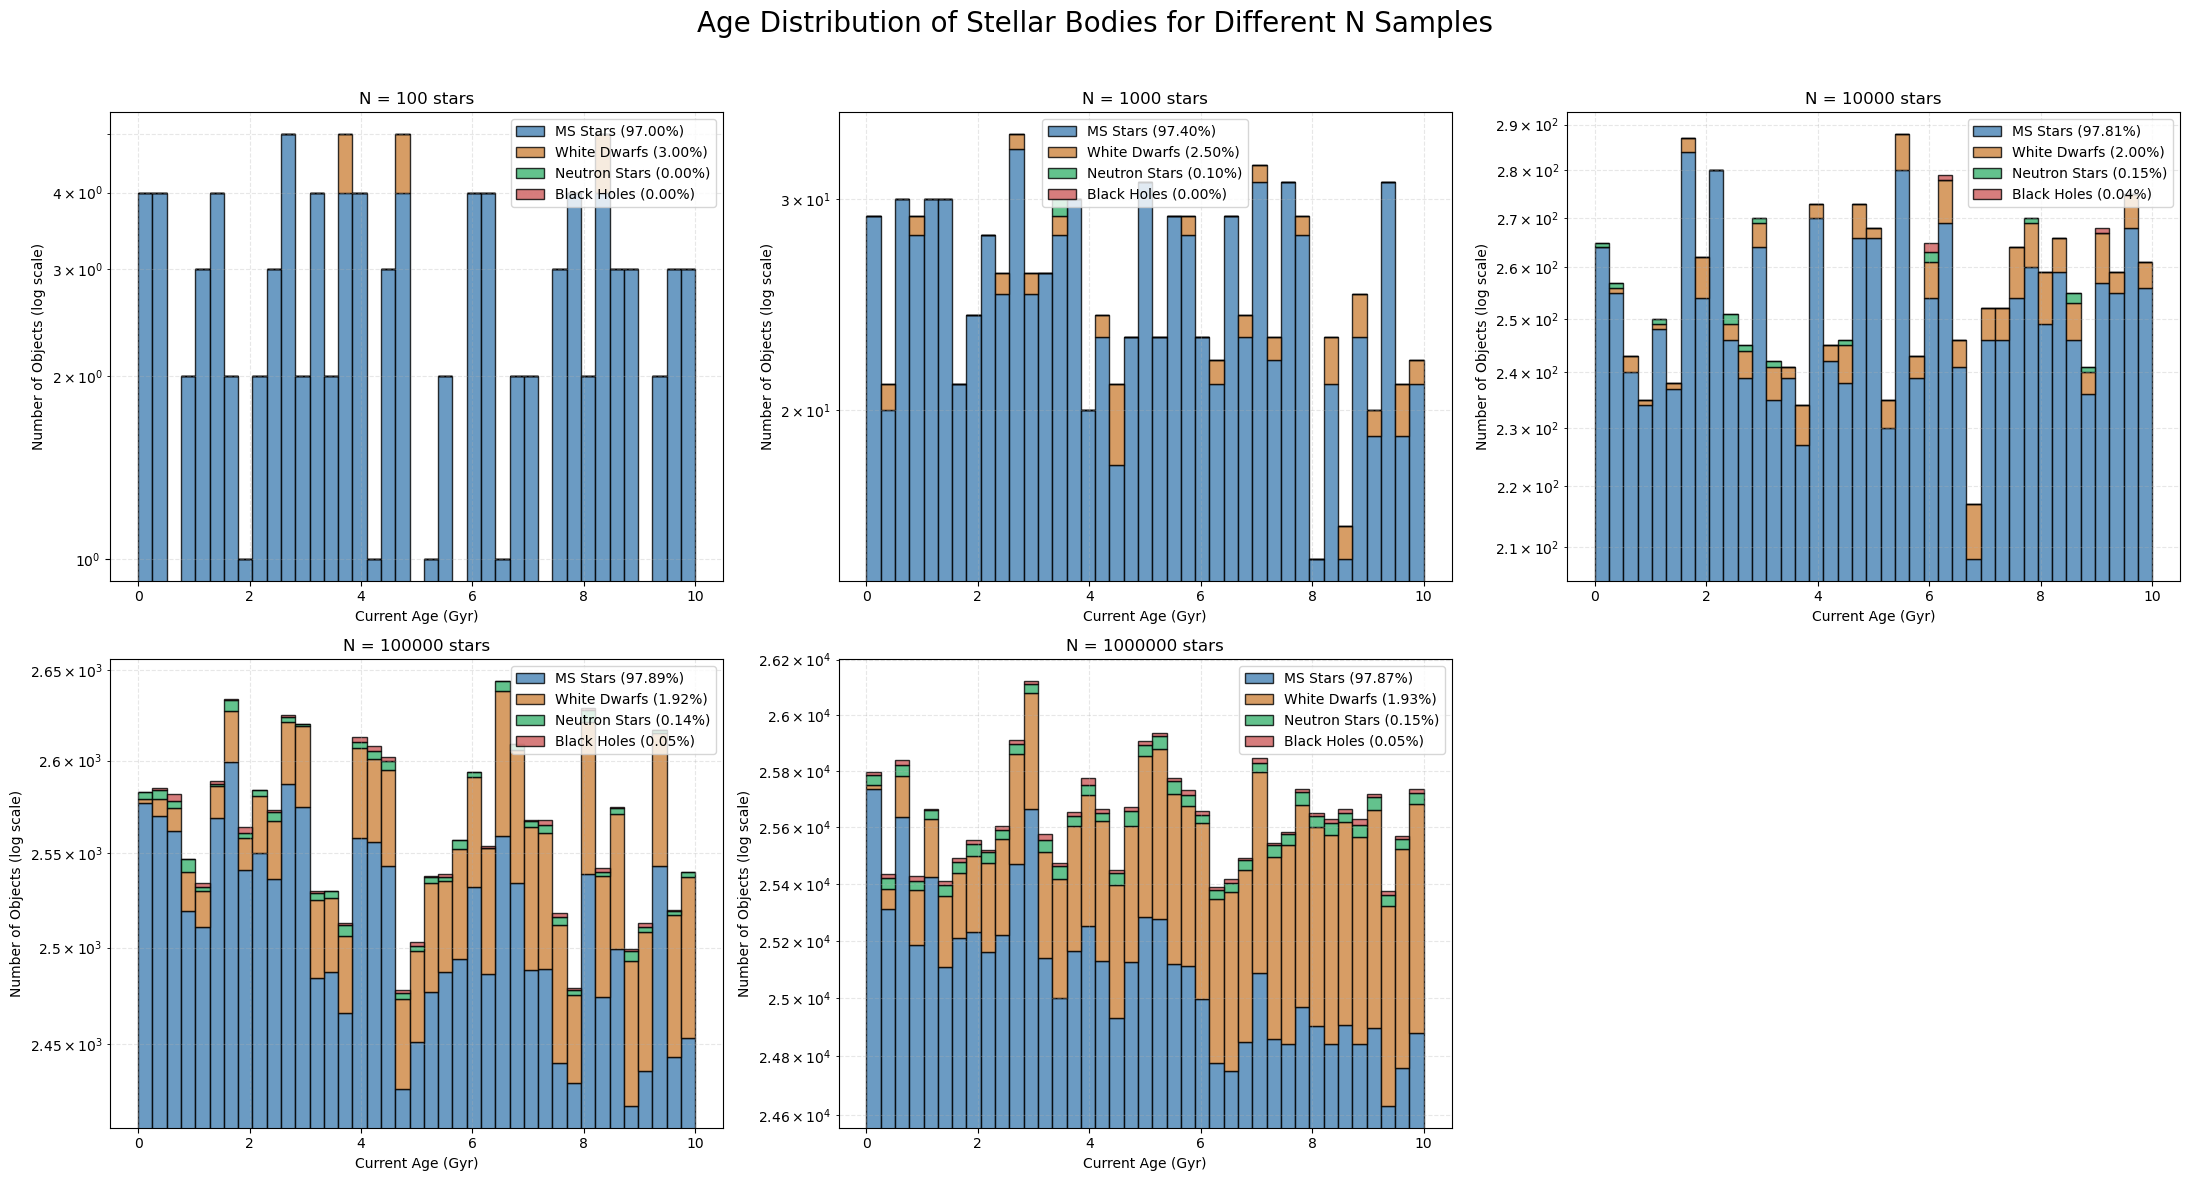

In [ ]:
"""
Final Project: Monte Carlo Simulation (Multi-plot Version with Percentages)
Stellar Population Synthesis for the Milky Way
"""

import numpy as np
import matplotlib.pyplot as plt

def run_simulation(n_stars):
    """
    Runs the entire Monte Carlo simulation for a given number of stars.
    """
    
    def generate_salpeter_masses(number_of_stars):
        masa_min, masa_max, alfa = 0.08, 100.0, 2.35
        masas_generadas = []
        prob_max = masa_min**(-alfa)
        
        while len(masas_generadas) < number_of_stars:
            n_needed = number_of_stars - len(masas_generadas)
            n_candidates = int(n_needed * 1.5)
            
            candidate_masses = np.random.uniform(masa_min, masa_max, n_candidates)
            mass_probabilities = candidate_masses**(-alfa)
            random_triggers = np.random.uniform(0, prob_max, n_candidates)
            
            accepted_masses = candidate_masses[random_triggers < mass_probabilities]
            masas_generadas.extend(accepted_masses)
            
        return np.array(masas_generadas[:number_of_stars])

    print(f"\n--- Running simulation for {n_stars} stars ---")
    
    galaxy_age = 10.0
    initial_masses = generate_salpeter_masses(n_stars)
    birth_times = np.random.uniform(0.0, galaxy_age, n_stars)
    current_ages = galaxy_age - birth_times
    ms_lifetimes = 10.0 / (initial_masses**2.5)
    
    is_ms = current_ages <= ms_lifetimes
    is_remnant = ~is_ms

    final_masses = np.zeros(n_stars)
    object_types = np.full(n_stars, "", dtype='<U12')
    
    final_masses[is_ms] = initial_masses[is_ms]
    object_types[is_ms] = 'MS Star'
    
    wd_mask = is_remnant & (initial_masses < 8)
    ns_mask = is_remnant & (initial_masses >= 8) & (initial_masses < 20)
    bh_mask = is_remnant & (initial_masses >= 20)
    
    final_masses[wd_mask] = 0.109 * initial_masses[wd_mask] + 0.394
    object_types[wd_mask] = 'White Dwarf'

    m_ns_1 = ns_mask & (initial_masses < 14.75)
    m_ini_1 = initial_masses[m_ns_1]
    final_masses[m_ns_1] = 2.24 + 0.508*(m_ini_1 - 14.75) + 0.125*(m_ini_1 - 14.75)**2 + 0.011*(m_ini_1 - 14.75)**3
    m_ns_2 = ns_mask & (initial_masses >= 14.75)
    m_ini_2 = initial_masses[m_ns_2]
    final_masses[m_ns_2] = 0.123 + 0.112 * m_ini_2
    object_types[ns_mask] = 'Neutron Star'

    fej = 0.9
    m_ini_bh = initial_masses[bh_mask]
    m_bh_core = -2.049 + 0.4140 * m_ini_bh
    m_bh_all = (15.52 - 0.3294*(m_ini_bh - 25.97) - 0.02121*(m_ini_bh - 25.97)**2 + 0.003120*(m_ini_bh - 25.97)**3)
    final_masses[bh_mask] = fej * m_bh_core + (1 - fej) * m_bh_all
    object_types[bh_mask] = 'Black Hole'

    print("Simulation finished.")
    return object_types, final_masses, current_ages


star_counts = [100, 1000, 10000, 100000, 1000000]


print("\n--- Generating Final Mass Distribution Plots ---")
fig_mass, axes_mass = plt.subplots(2, 3, figsize=(22, 12))
axes_mass = axes_mass.flatten() 

for i, n_stars in enumerate(star_counts):
    ax = axes_mass[i]
    object_types, final_masses, _ = run_simulation(n_stars)

    masses_ms = final_masses[object_types == 'MS Star']
    masses_wd = final_masses[object_types == 'White Dwarf']
    masses_ns = final_masses[object_types == 'Neutron Star']
    masses_bh = final_masses[object_types == 'Black Hole']
    
    mass_bins = np.logspace(np.log10(0.08), np.log10(100), 50)
    
   
    label_ms = f'MS ({len(masses_ms)/n_stars:.2%})'
    label_wd = f'WD ({len(masses_wd)/n_stars:.2%})'
    label_ns = f'NS ({len(masses_ns)/n_stars:.2%})'
    label_bh = f'BH ({len(masses_bh)/n_stars:.2%})'
    
    ax.hist(masses_ms, bins=mass_bins, histtype='step', density=True, linewidth=2, label=label_ms)
    ax.hist(masses_wd, bins=mass_bins, histtype='step', density=True, linewidth=2, label=label_wd)
    ax.hist(masses_ns, bins=mass_bins, histtype='step', density=True, linewidth=2, label=label_ns)
    ax.hist(masses_bh, bins=mass_bins, histtype='step', density=True, linewidth=2, label=label_bh)
    
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_title(f'N = {n_stars} stars')
    ax.set_xlabel('Final Mass (M☉)')
    ax.set_ylabel('Probability Density')
    ax.legend()
    ax.grid(True, which="both", ls="--", alpha=0.5)

fig_mass.delaxes(axes_mass[5])
fig_mass.suptitle('Normalized Final Mass Distribution for Different N Samples', fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


print("\n--- Generating Age Distribution Plots ---")
fig_age, axes_age = plt.subplots(2, 3, figsize=(22, 12))
axes_age = axes_age.flatten()

for i, n_stars in enumerate(star_counts):
    ax = axes_age[i]
    object_types, _, current_ages = run_simulation(n_stars)
    
    ages_ms = current_ages[object_types == 'MS Star']
    ages_wd = current_ages[object_types == 'White Dwarf']
    ages_ns = current_ages[object_types == 'Neutron Star']
    ages_bh = current_ages[object_types == 'Black Hole']
    
    age_bins = np.linspace(0, 10, 40)
    
   
    labels_with_perc = [
        f'MS Stars ({len(ages_ms)/n_stars:.2%})',
        f'White Dwarfs ({len(ages_wd)/n_stars:.2%})',
        f'Neutron Stars ({len(ages_ns)/n_stars:.2%})',
        f'Black Holes ({len(ages_bh)/n_stars:.2%})'
    ]
    
    colors = ['steelblue', 'peru', 'mediumseagreen', 'indianred']
    
    ax.hist([ages_ms, ages_wd, ages_ns, ages_bh],
            bins=age_bins,
            stacked=True,
            label=labels_with_perc, # Usamos las nuevas etiquetas
            color=colors,
            alpha=0.8,
            edgecolor='black')
    
    ax.set_yscale('log')
    ax.set_title(f'N = {n_stars} stars')
    ax.set_xlabel('Current Age (Gyr)')
    ax.set_ylabel('Number of Objects (log scale)')
    ax.legend()
    ax.grid(True, which="both", ls="--", alpha=0.3)
    
fig_age.delaxes(axes_age[5])
fig_age.suptitle('Age Distribution of Stellar Bodies for Different N Samples', fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()